In [41]:
!pip install  yfinance plotly

In [48]:
import requests
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [49]:
crypto_dict = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Binance Coin': 'BNB-USD',
    'Cardano': 'ADA-USD',
    'XRP': 'XRP-USD',
    'Dogecoin': 'DOGE-USD',
    'Polkadot': 'DOT1-USD',
    'Uniswap': 'UNI3-USD',
    'Litecoin': 'LTC-USD',
    'Chainlink': 'LINK-USD',
    'Bitcoin Cash': 'BCH-USD',
    'Stellar': 'XLM-USD',
    'USD Coin': 'USDC-USD',
    'Solana': 'SOL-USD',
    'Tether': 'USDT-USD',
    'Polygon': 'MATIC-USD',
    'Ethereum Classic': 'ETC-USD',
    'Internet Computer': 'ICP1-USD',
    'VeChain': 'VET-USD',
    'Filecoin': 'FIL-USD',
    'Lido Staked Ether': 'STETH-USD',
    'BNB': 'BNB-USD',
    'USDC': 'USDC-USD',
}

In [50]:
import requests

def get_top_crypto():
    api_url = "https://api.coingecko.com/api/v3/coins/markets"

    # Parameters for the API request
    params = {
        'vs_currency': 'usd',   # You can change the currency if needed
        'order': 'market_cap_desc',
        'per_page': 10,
        'page': 1,
        'sparkline': False,
    }

    try:
        response = requests.get(api_url, params=params)
        data = response.json()

        top_cryptos = [
            {
                'name': crypto['name'],
                'ticker': crypto_dict.get(crypto['name'])
            }
            for crypto in data
        ]

        return top_cryptos

    except Exception as e:
        print(f"Error fetching cryptocurrency data: {e}")
        return None


top_cryptos = get_top_crypto()

if top_cryptos:
    for crypto in top_cryptos:
        print(f"{crypto['name']}  (Ticker: {crypto['ticker']})")


Bitcoin  (Ticker: BTC-USD)
Ethereum  (Ticker: ETH-USD)
Tether  (Ticker: USDT-USD)
BNB  (Ticker: BNB-USD)
Solana  (Ticker: SOL-USD)
XRP  (Ticker: XRP-USD)
USDC  (Ticker: USDC-USD)
Lido Staked Ether  (Ticker: STETH-USD)
Cardano  (Ticker: ADA-USD)
Avalanche  (Ticker: None)


In [51]:


def download_crypto_data(ticker, start_date, end_date):
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        return data

    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")
        return None

# Set the end date as today
end_date = datetime.today().strftime('%Y-%m-%d')

# Calculate the start date as 2 years ago from today
start_date = (datetime.today() - timedelta(days=2 * 365)).strftime('%Y-%m-%d')

# Create an empty dictionary to store dataframes for each cryptocurrency
crypto_dataframes = {}

# Download historical data for each cryptocurrency in top_cryptos
for crypto in top_cryptos:
    crypto_name = crypto['name']
    ticker = crypto['ticker']

    if ticker is not None:
        data = download_crypto_data(ticker, start_date, end_date)

        if data is not None and not data.empty:
            crypto_dataframes[crypto_name] = data


# Optionally, you can save each dataframe to a separate CSV file
for crypto_name, data in crypto_dataframes.items():
    data.to_csv(f"{crypto_name}_historical_data_2_years.csv", index=False)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [52]:
# Displaying the first few rows of the downloaded dataframes
for crypto_name, data in crypto_dataframes.items():
    print(f"\n{crypto_name} Historical Data:")
    print(data.head())
    print(data.tail())



Bitcoin Historical Data:
                    Open          High           Low         Close  \
Date                                                                 
2022-01-24  36275.734375  37247.519531  33184.058594  36654.328125   
2022-01-25  36654.804688  37444.570312  35779.429688  36954.003906   
2022-01-26  36950.515625  38825.410156  36374.906250  36852.121094   
2022-01-27  36841.878906  37148.324219  35629.281250  37138.234375   
2022-01-28  37128.445312  37952.878906  36211.109375  37784.332031   

               Adj Close       Volume  
Date                                   
2022-01-24  36654.328125  41856658597  
2022-01-25  36954.003906  26428189594  
2022-01-26  36852.121094  31324598034  
2022-01-27  37138.234375  25041426629  
2022-01-28  37784.332031  22238830523  
                    Open          High           Low         Close  \
Date                                                                 
2024-01-19  41278.460938  42134.160156  40297.457031  41618.406


Bitcoin Historical Data with Changes:
                    Open          High           Low         Close  \
Date                                                                 
2022-01-24  36275.734375  37247.519531  33184.058594  36654.328125   
2022-01-25  36654.804688  37444.570312  35779.429688  36954.003906   
2022-01-26  36950.515625  38825.410156  36374.906250  36852.121094   
2022-01-27  36841.878906  37148.324219  35629.281250  37138.234375   
2022-01-28  37128.445312  37952.878906  36211.109375  37784.332031   

                 Volume  
Date                     
2022-01-24  41856658597  
2022-01-25  26428189594  
2022-01-26  31324598034  
2022-01-27  25041426629  
2022-01-28  22238830523  


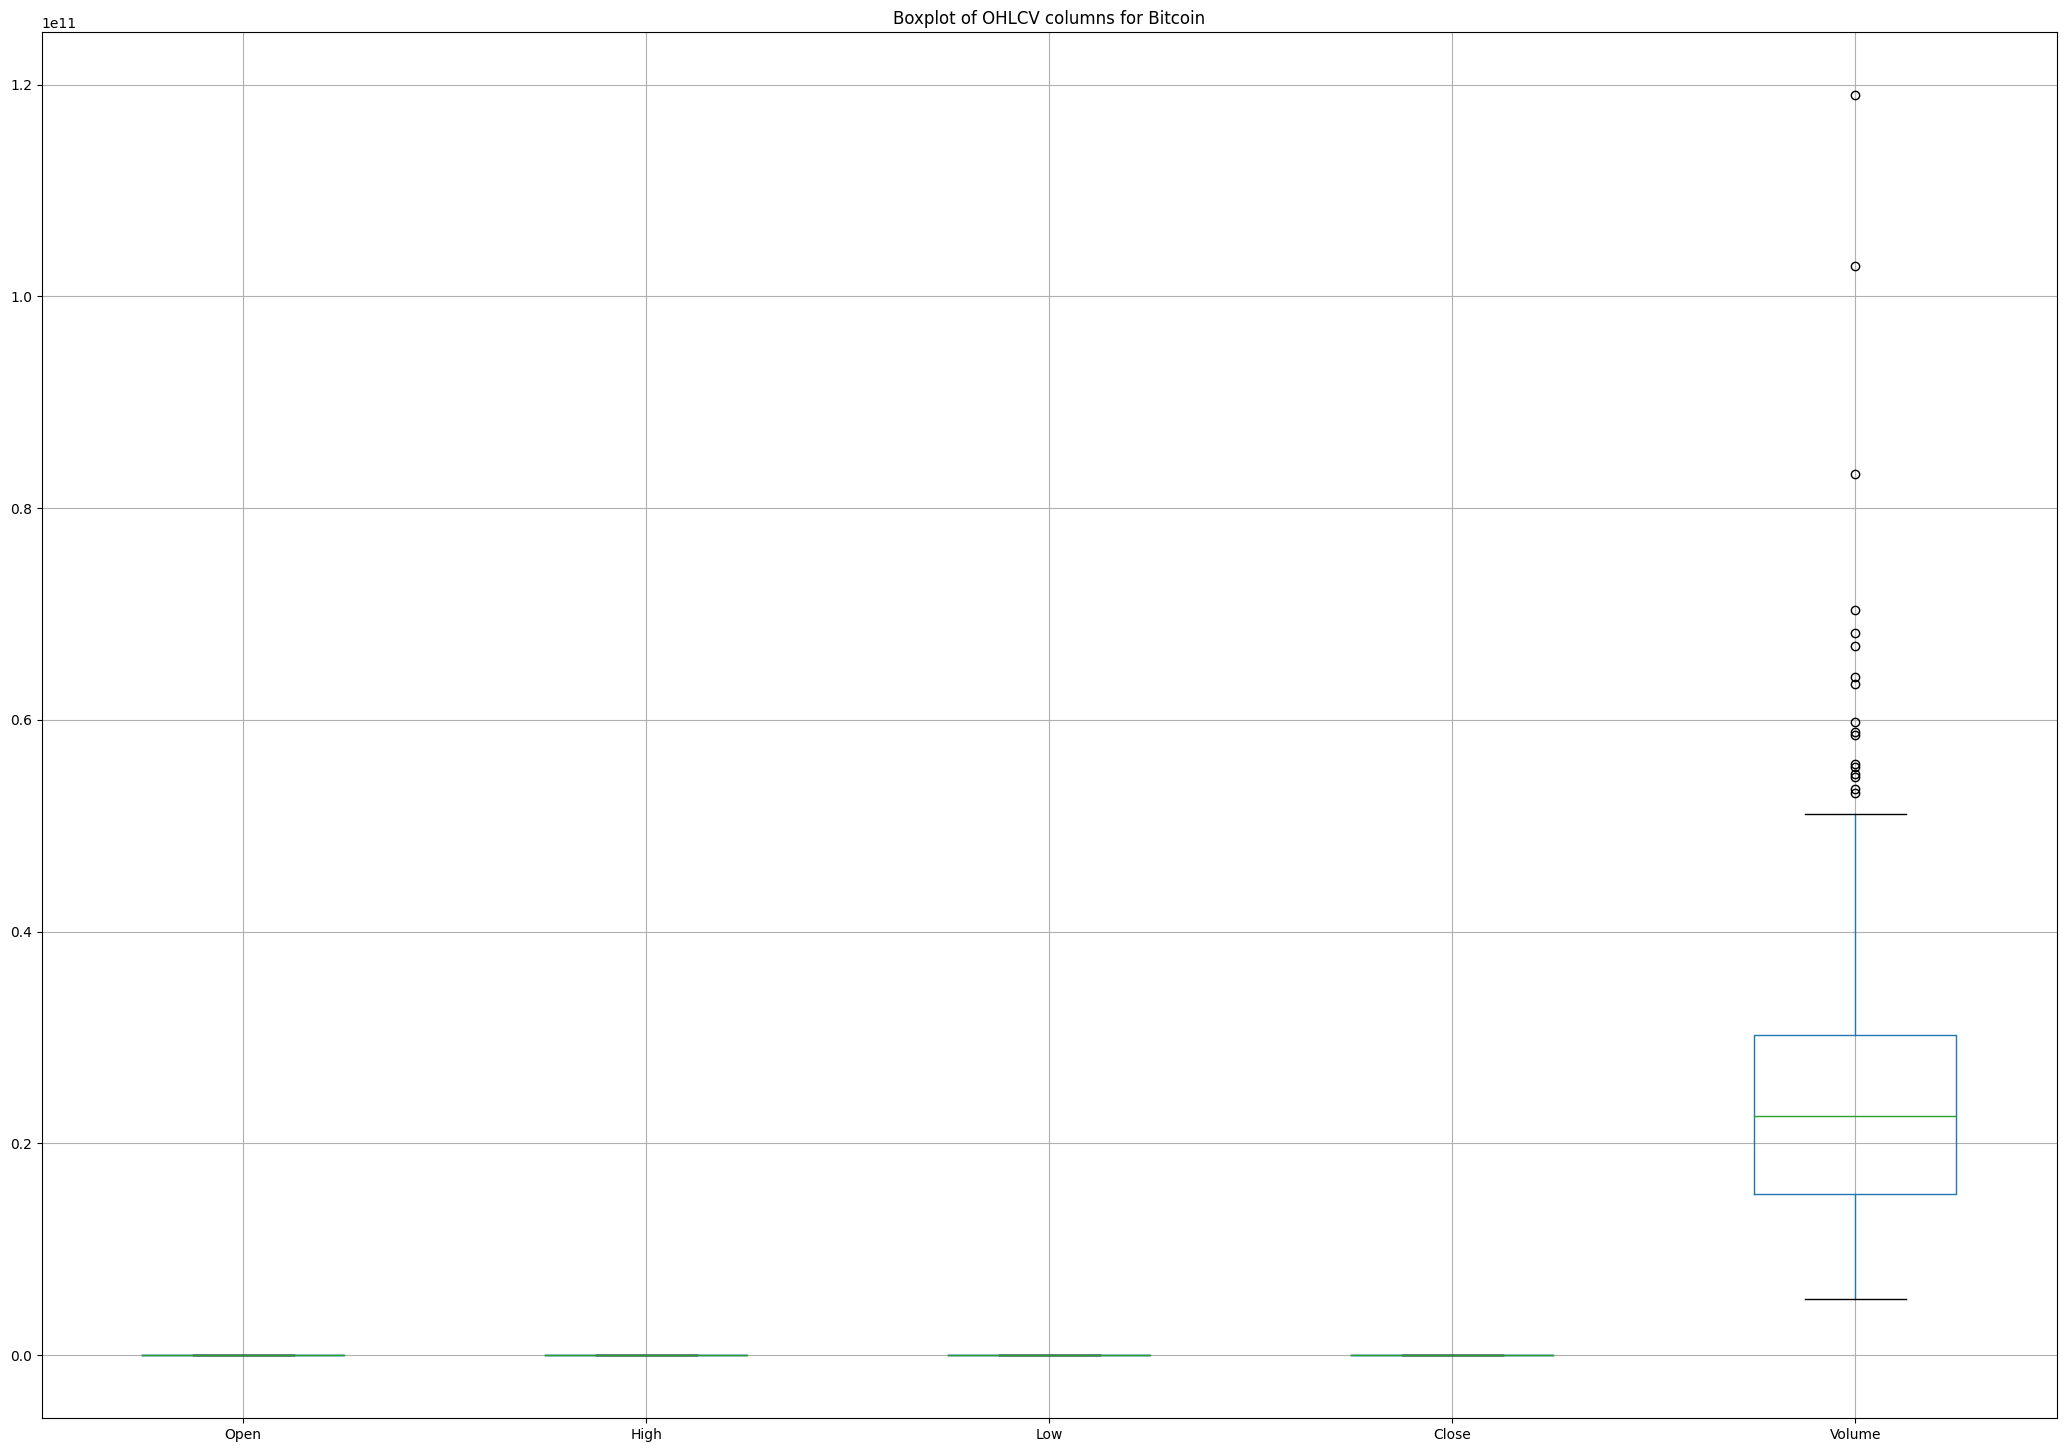


Ethereum Historical Data with Changes:
                   Open         High          Low        Close       Volume
Date                                                                       
2022-01-24  2535.891113  2537.208496  2172.301270  2440.352295  28220804648
2022-01-25  2440.393555  2498.507080  2359.384766  2455.935059  16179776932
2022-01-26  2455.579102  2705.784180  2417.683105  2468.030273  21229909340
2022-01-27  2467.188477  2510.451660  2328.452148  2423.001221  16126522783
2022-01-28  2421.646973  2548.778564  2367.833740  2547.092041  14666227351


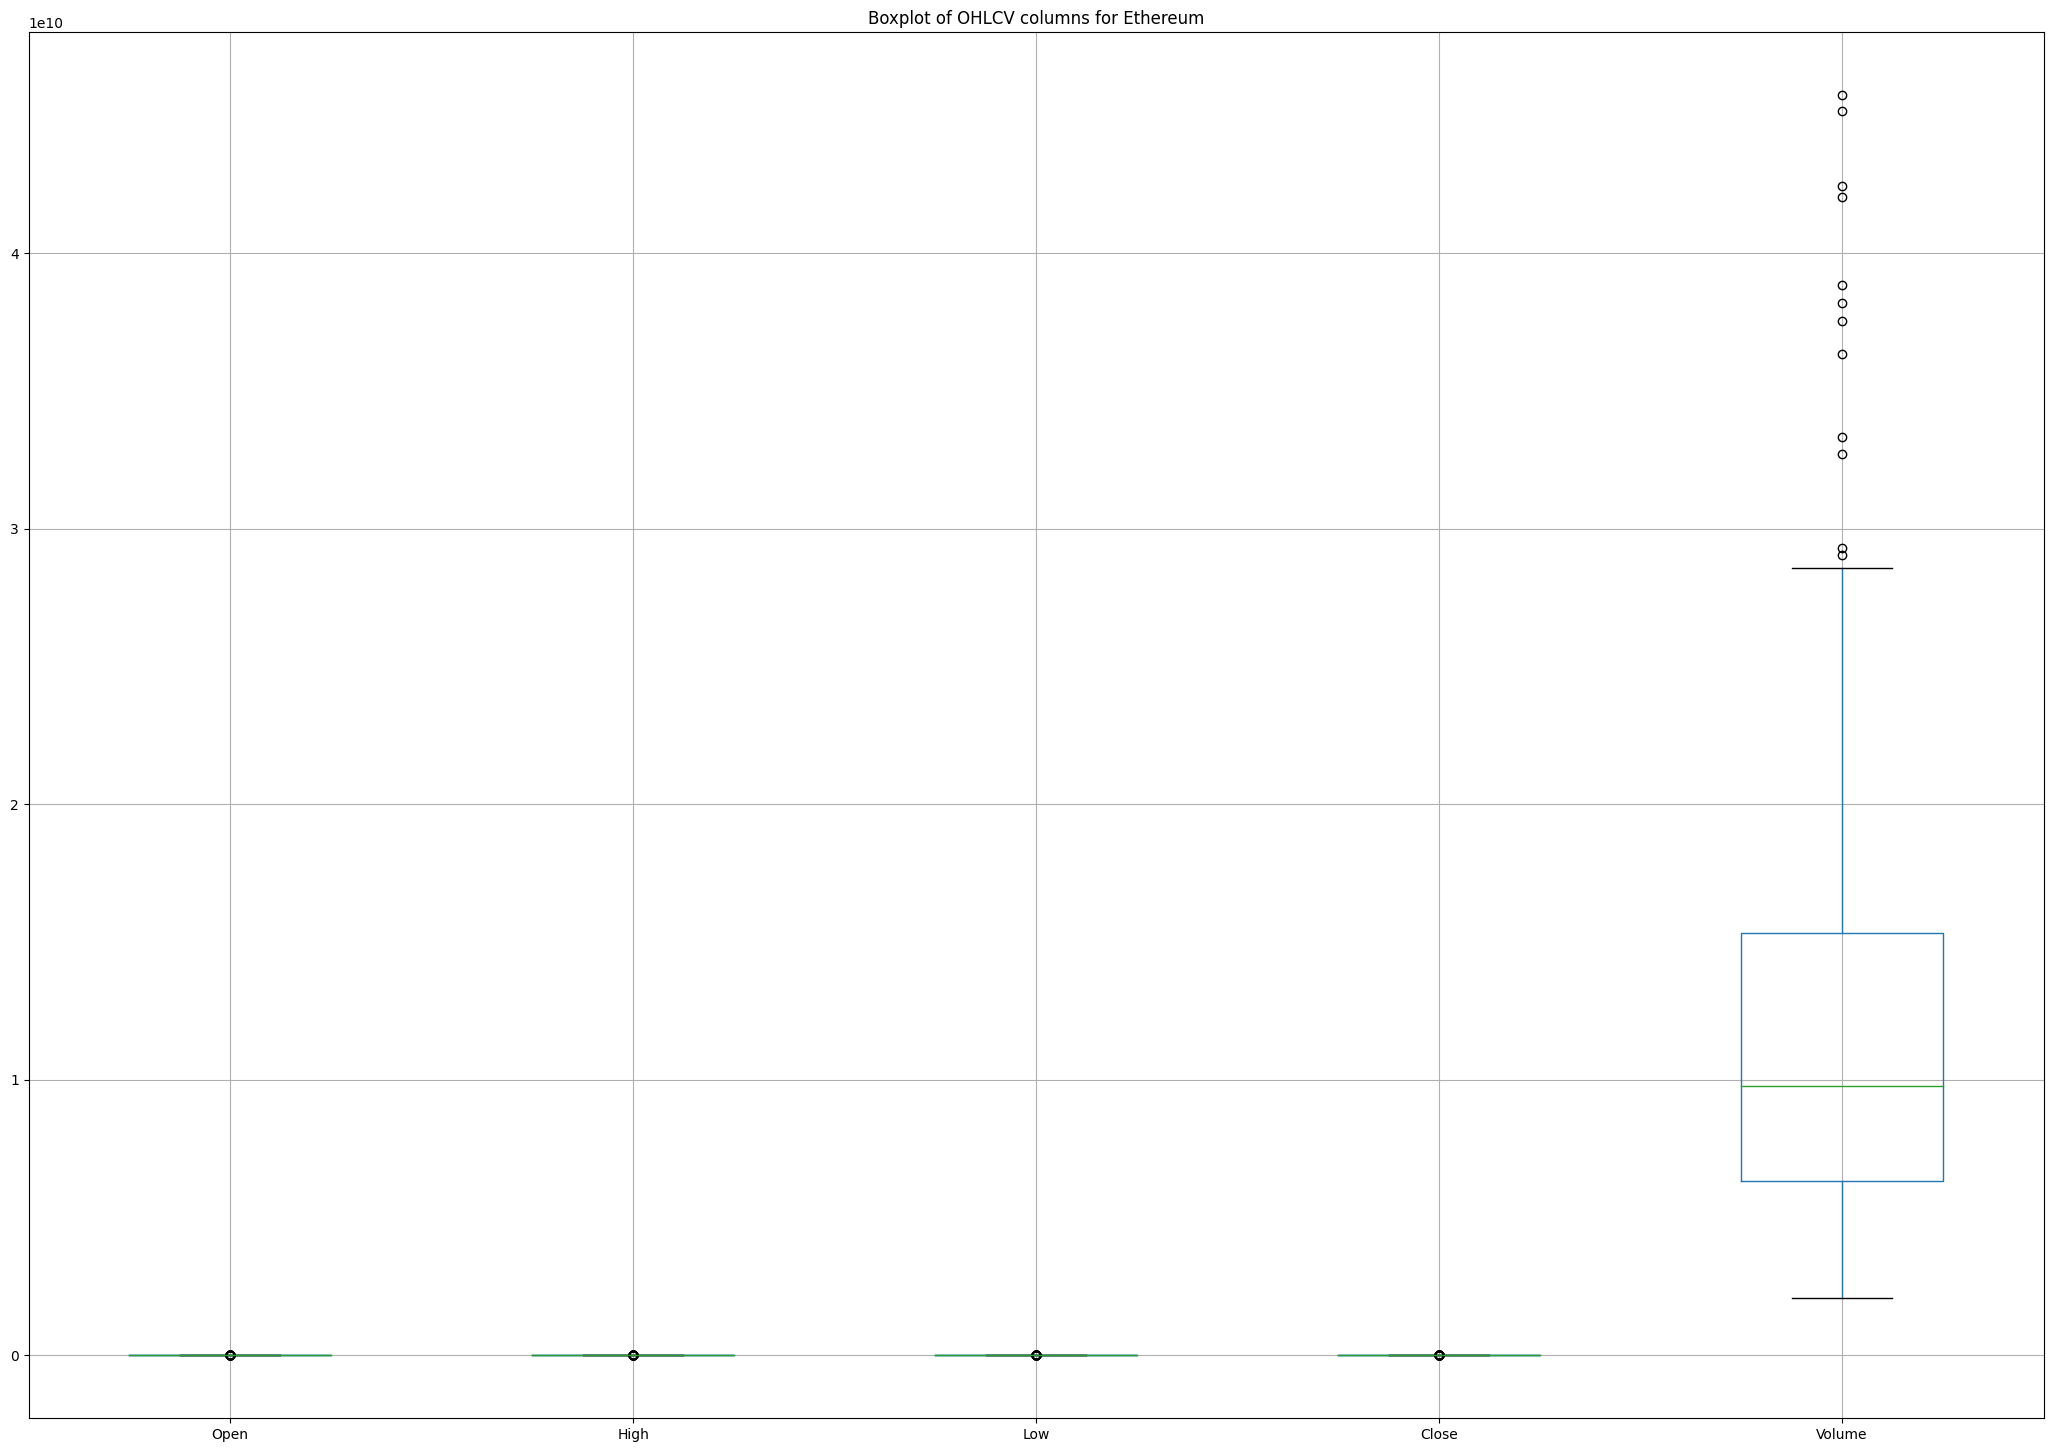


Tether Historical Data with Changes:
                Open      High       Low     Close       Volume
Date                                                           
2022-01-24  1.000498  1.001062  1.000108  1.000439  88845381041
2022-01-25  1.000442  1.000902  1.000169  1.000604  58560287216
2022-01-26  1.000595  1.001117  1.000290  1.000630  70750980627
2022-01-27  1.000632  1.000859  1.000207  1.000344  53950927548
2022-01-28  1.000343  1.000723  1.000151  1.000345  50688257403


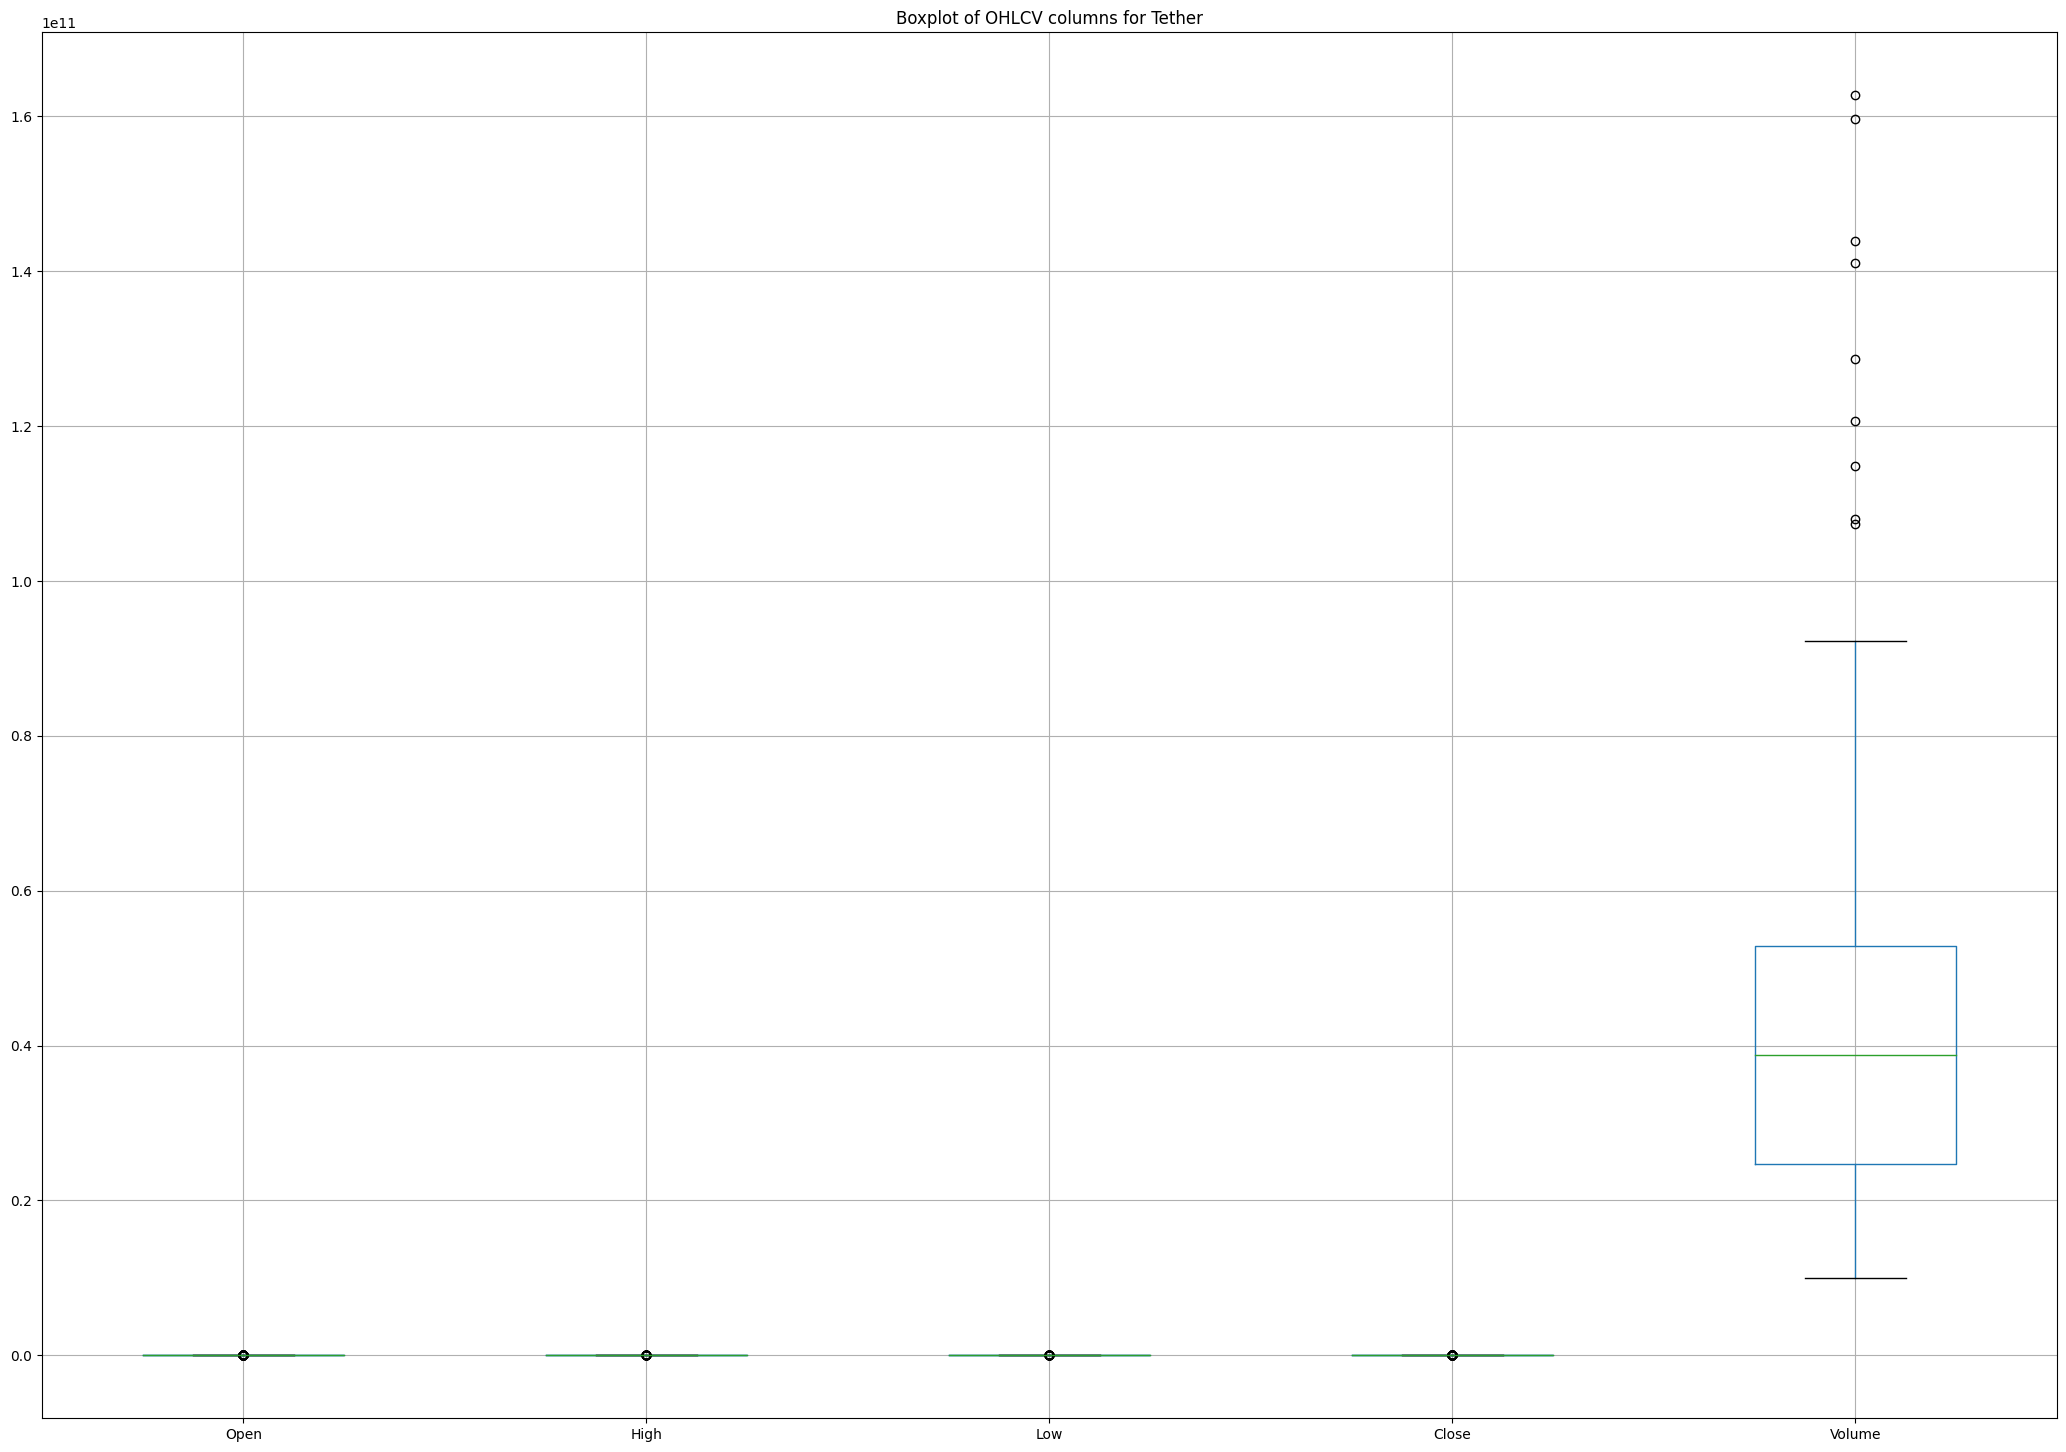


BNB Historical Data with Changes:
                  Open        High         Low       Close      Volume
Date                                                                  
2022-01-24  384.040619  384.040619  337.853943  371.368958  3210871602
2022-01-25  371.386841  387.176849  358.083557  384.619354  2325661159
2022-01-26  384.586243  400.152069  367.575104  375.755463  2226973227
2022-01-27  375.542175  391.804382  360.331696  390.088287  1952844398
2022-01-28  390.000671  393.375580  376.752167  386.084381  1592850476


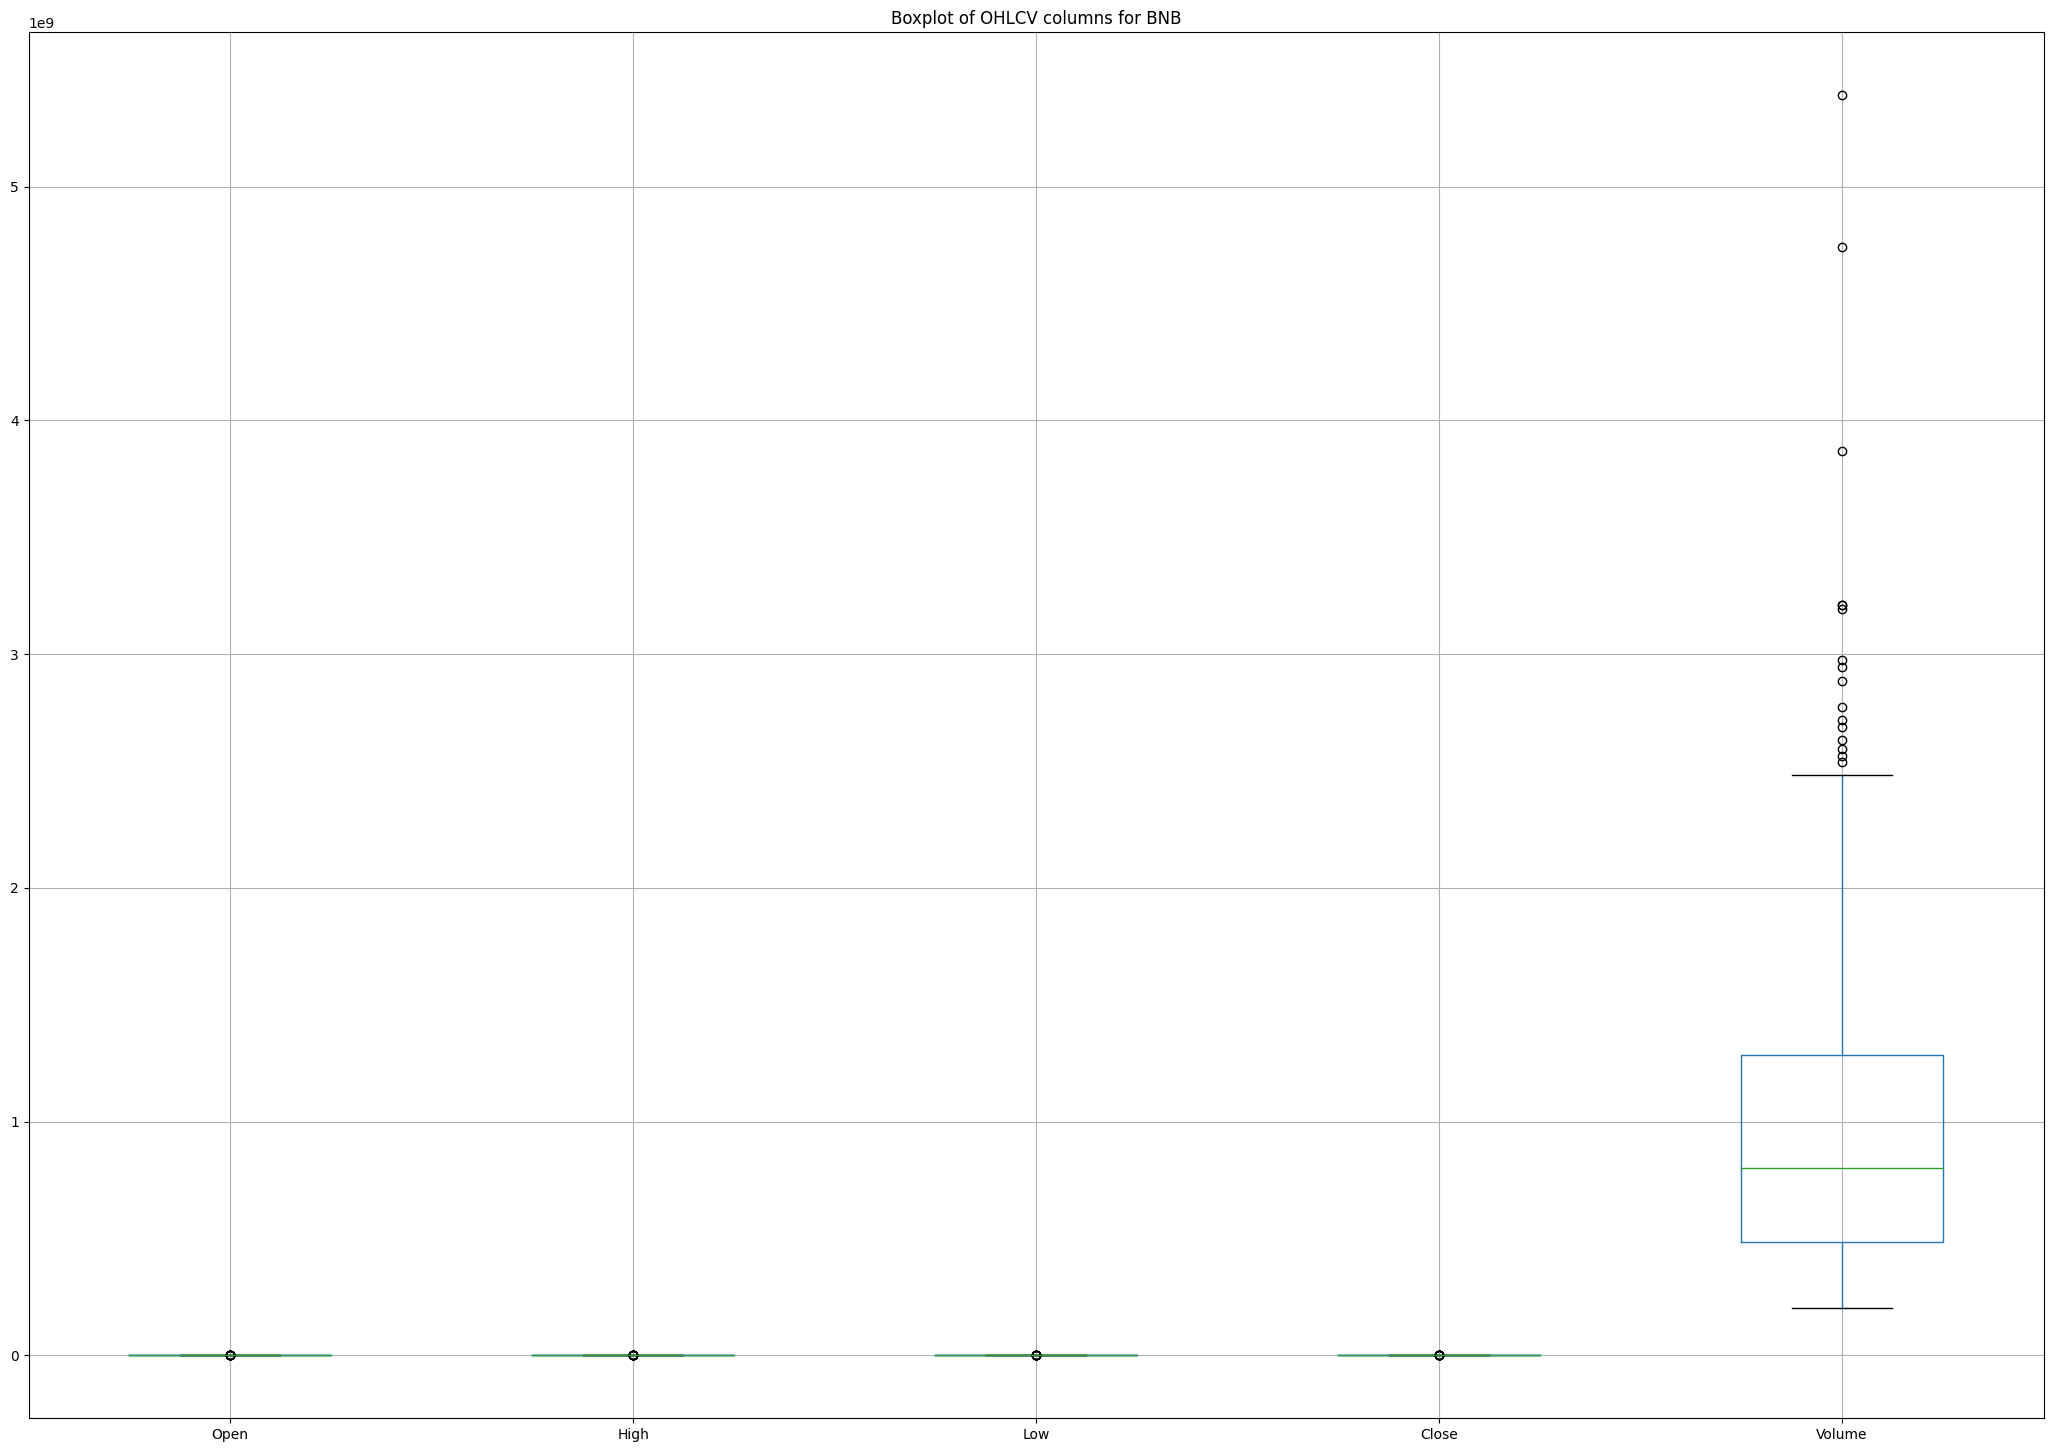


Solana Historical Data with Changes:
                 Open        High        Low      Close      Volume
Date                                                               
2022-01-24  99.617516   99.770515  81.226051  91.650162  4664539688
2022-01-25  91.660156   99.701233  87.757126  94.720352  2842652332
2022-01-26  94.718834  103.721558  89.807556  92.238045  3177186515
2022-01-27  92.218056   94.059998  86.186035  89.632492  2513945822
2022-01-28  89.529091   93.364670  87.574242  91.312897  2156098049


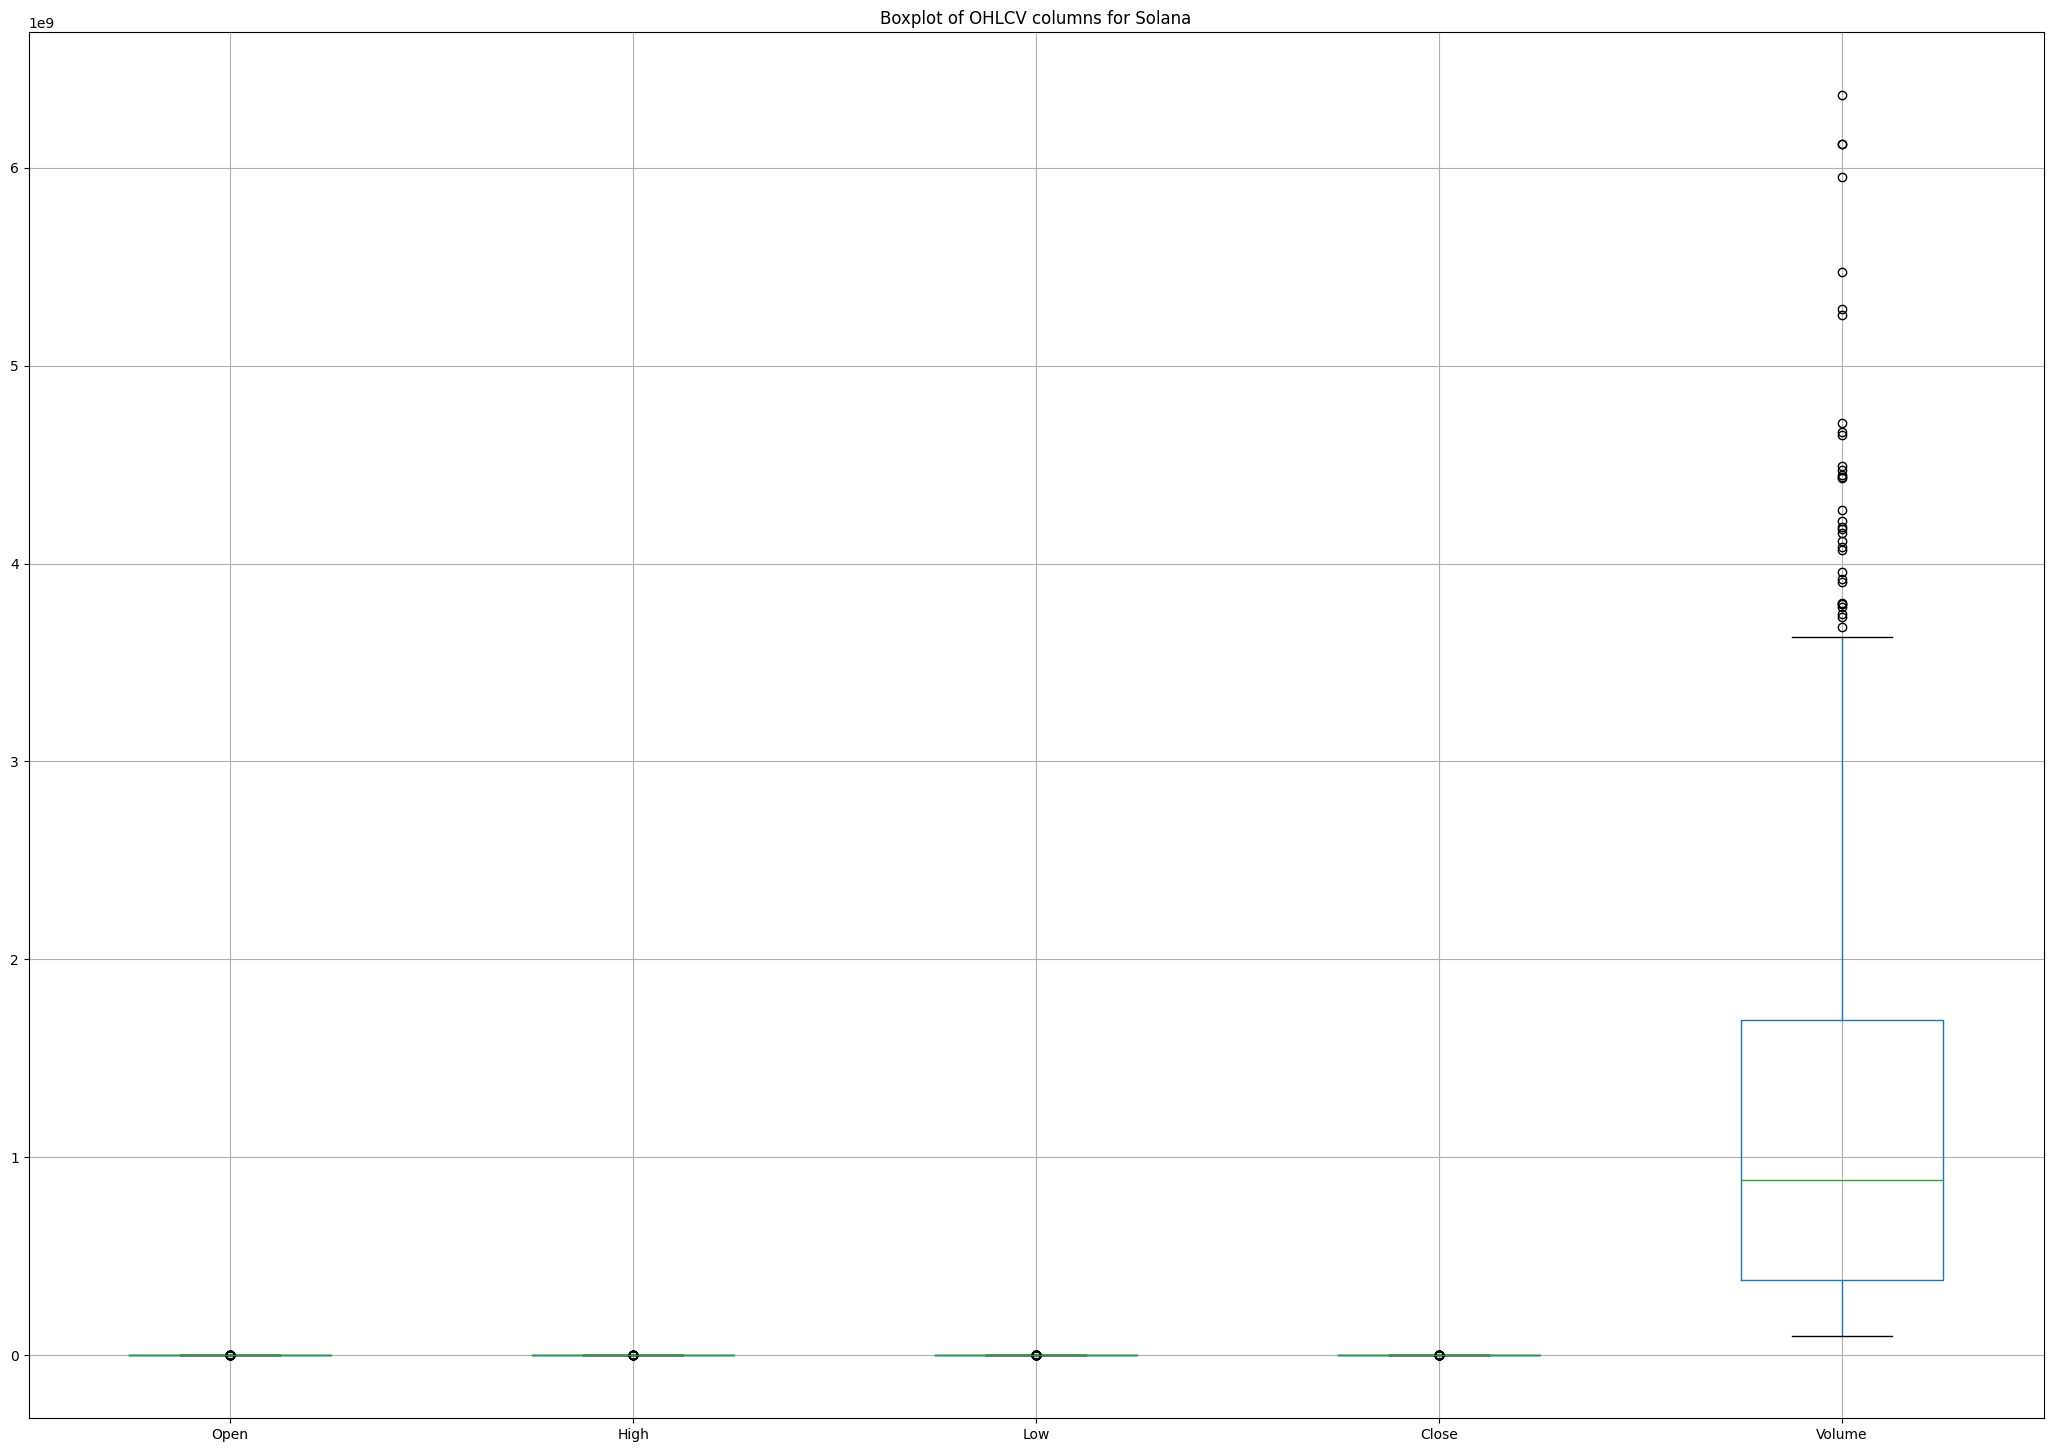


XRP Historical Data with Changes:
                Open      High       Low     Close      Volume
Date                                                          
2022-01-24  0.628770  0.628770  0.558668  0.612139  2759980202
2022-01-25  0.612144  0.621229  0.589888  0.617563  1731121388
2022-01-26  0.617544  0.652549  0.608588  0.622072  2302112575
2022-01-27  0.621945  0.623508  0.591465  0.608770  1586137620
2022-01-28  0.608619  0.612861  0.593397  0.612512  1318006848


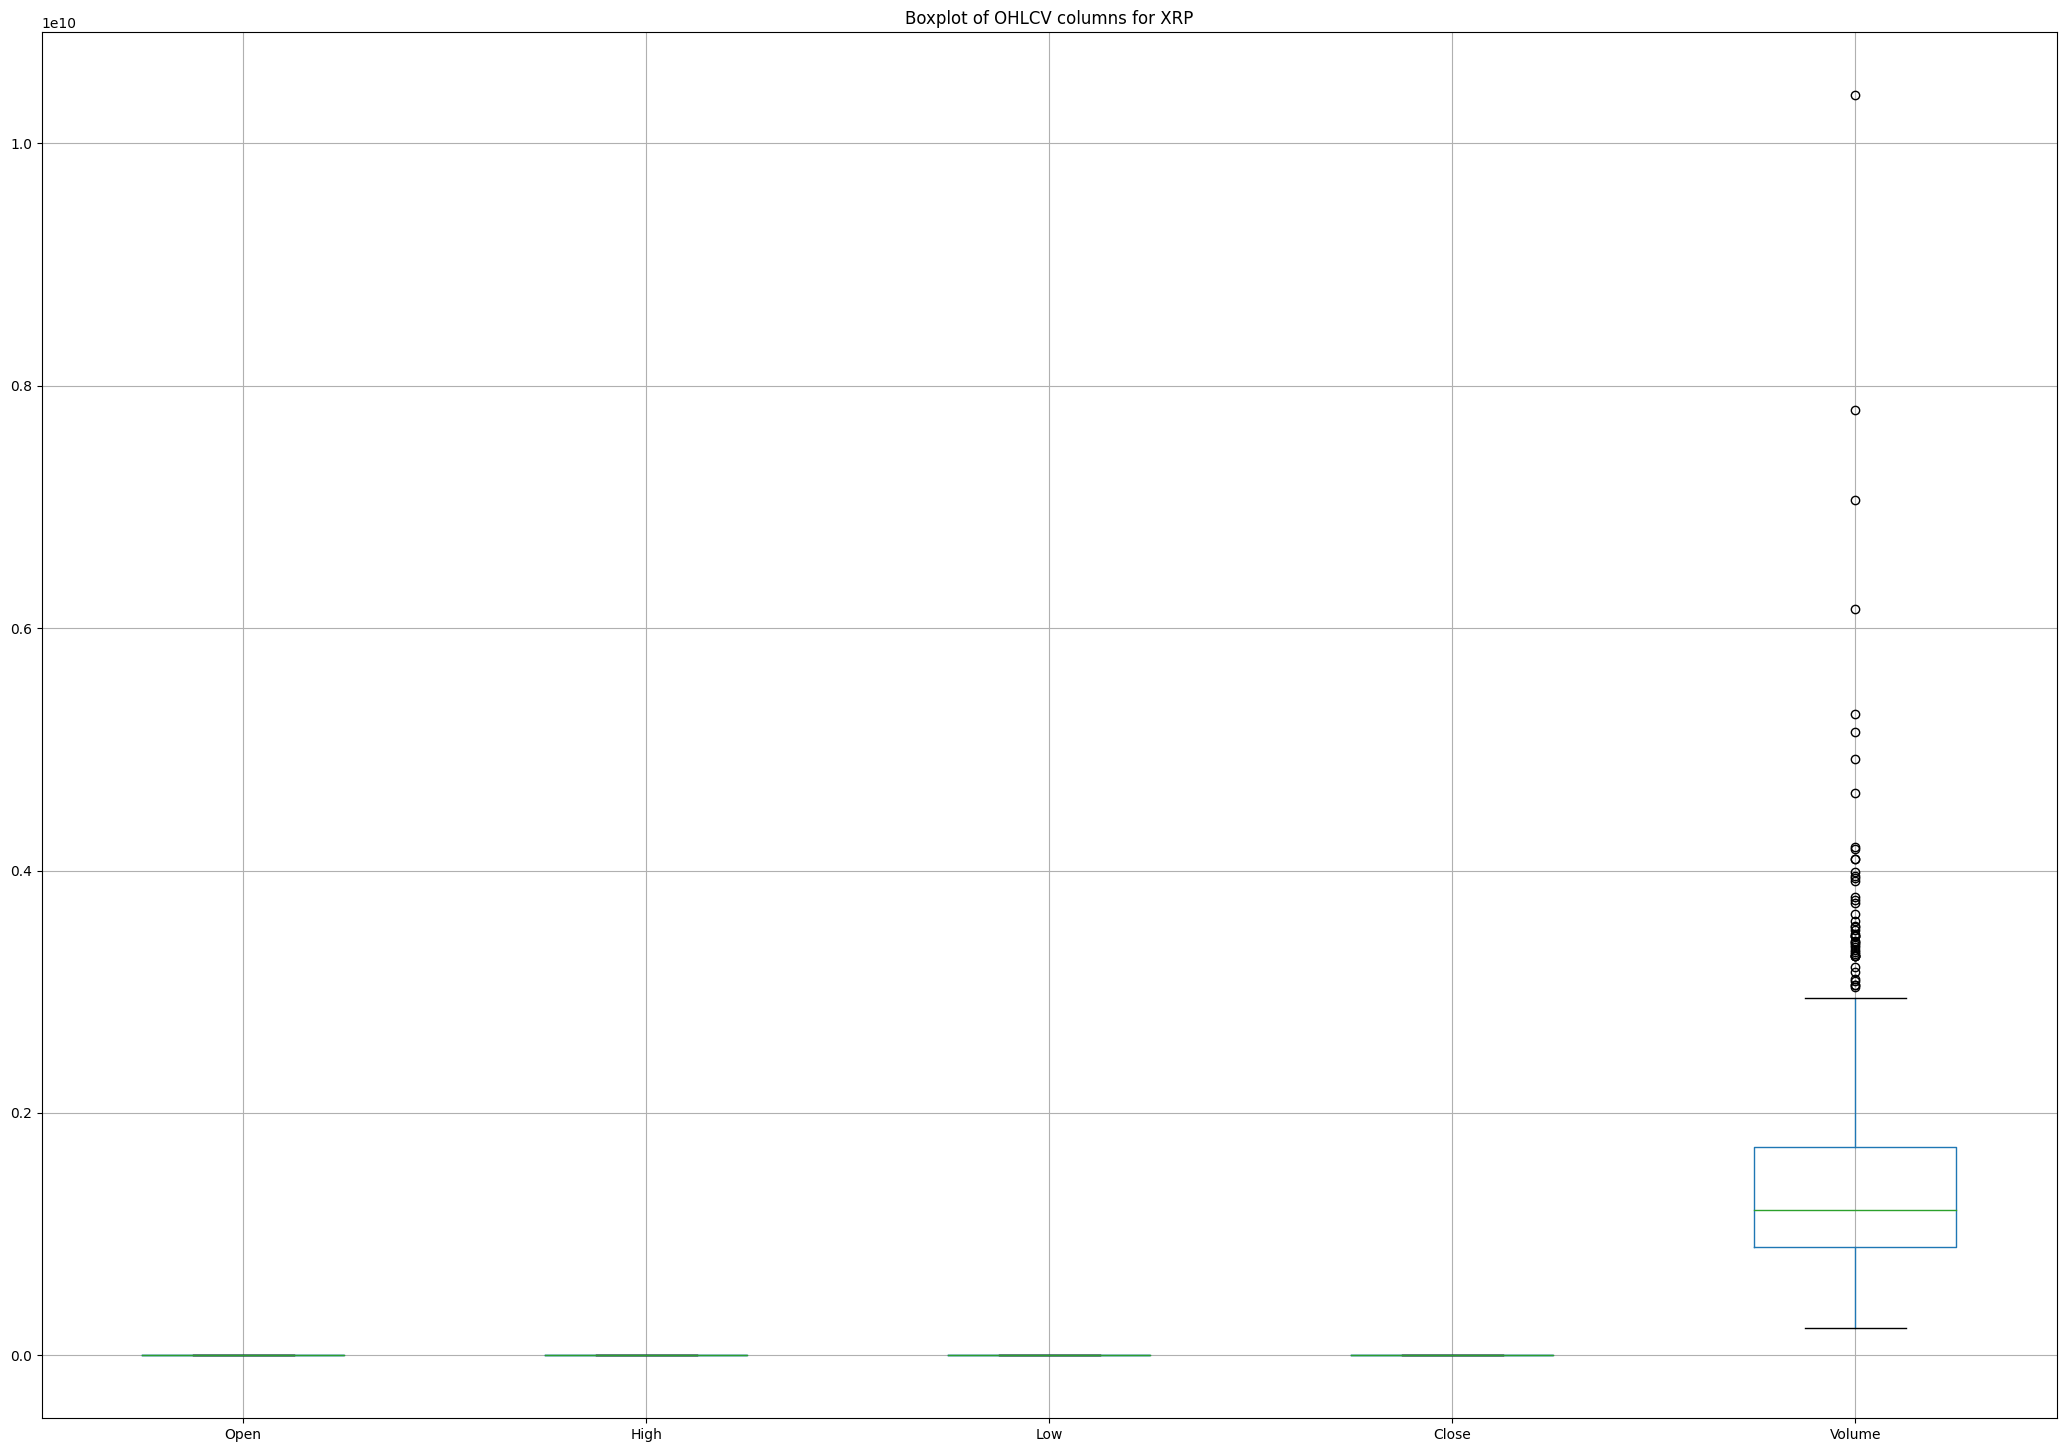


USDC Historical Data with Changes:
                Open      High       Low     Close          Volume
Date                                                              
2022-01-24  1.000170  1.000990  0.999131  1.000305      7468827146
2022-01-25  1.000318  1.001090  0.999031  1.000429      4146328235
2022-01-26  1.000420  1.000886  0.998853  0.999935  83252070566791
2022-01-27  0.999850  1.001183  0.998923  0.999776      5023632111
2022-01-28  0.999749  1.001276  0.998969  0.999651      4809047239


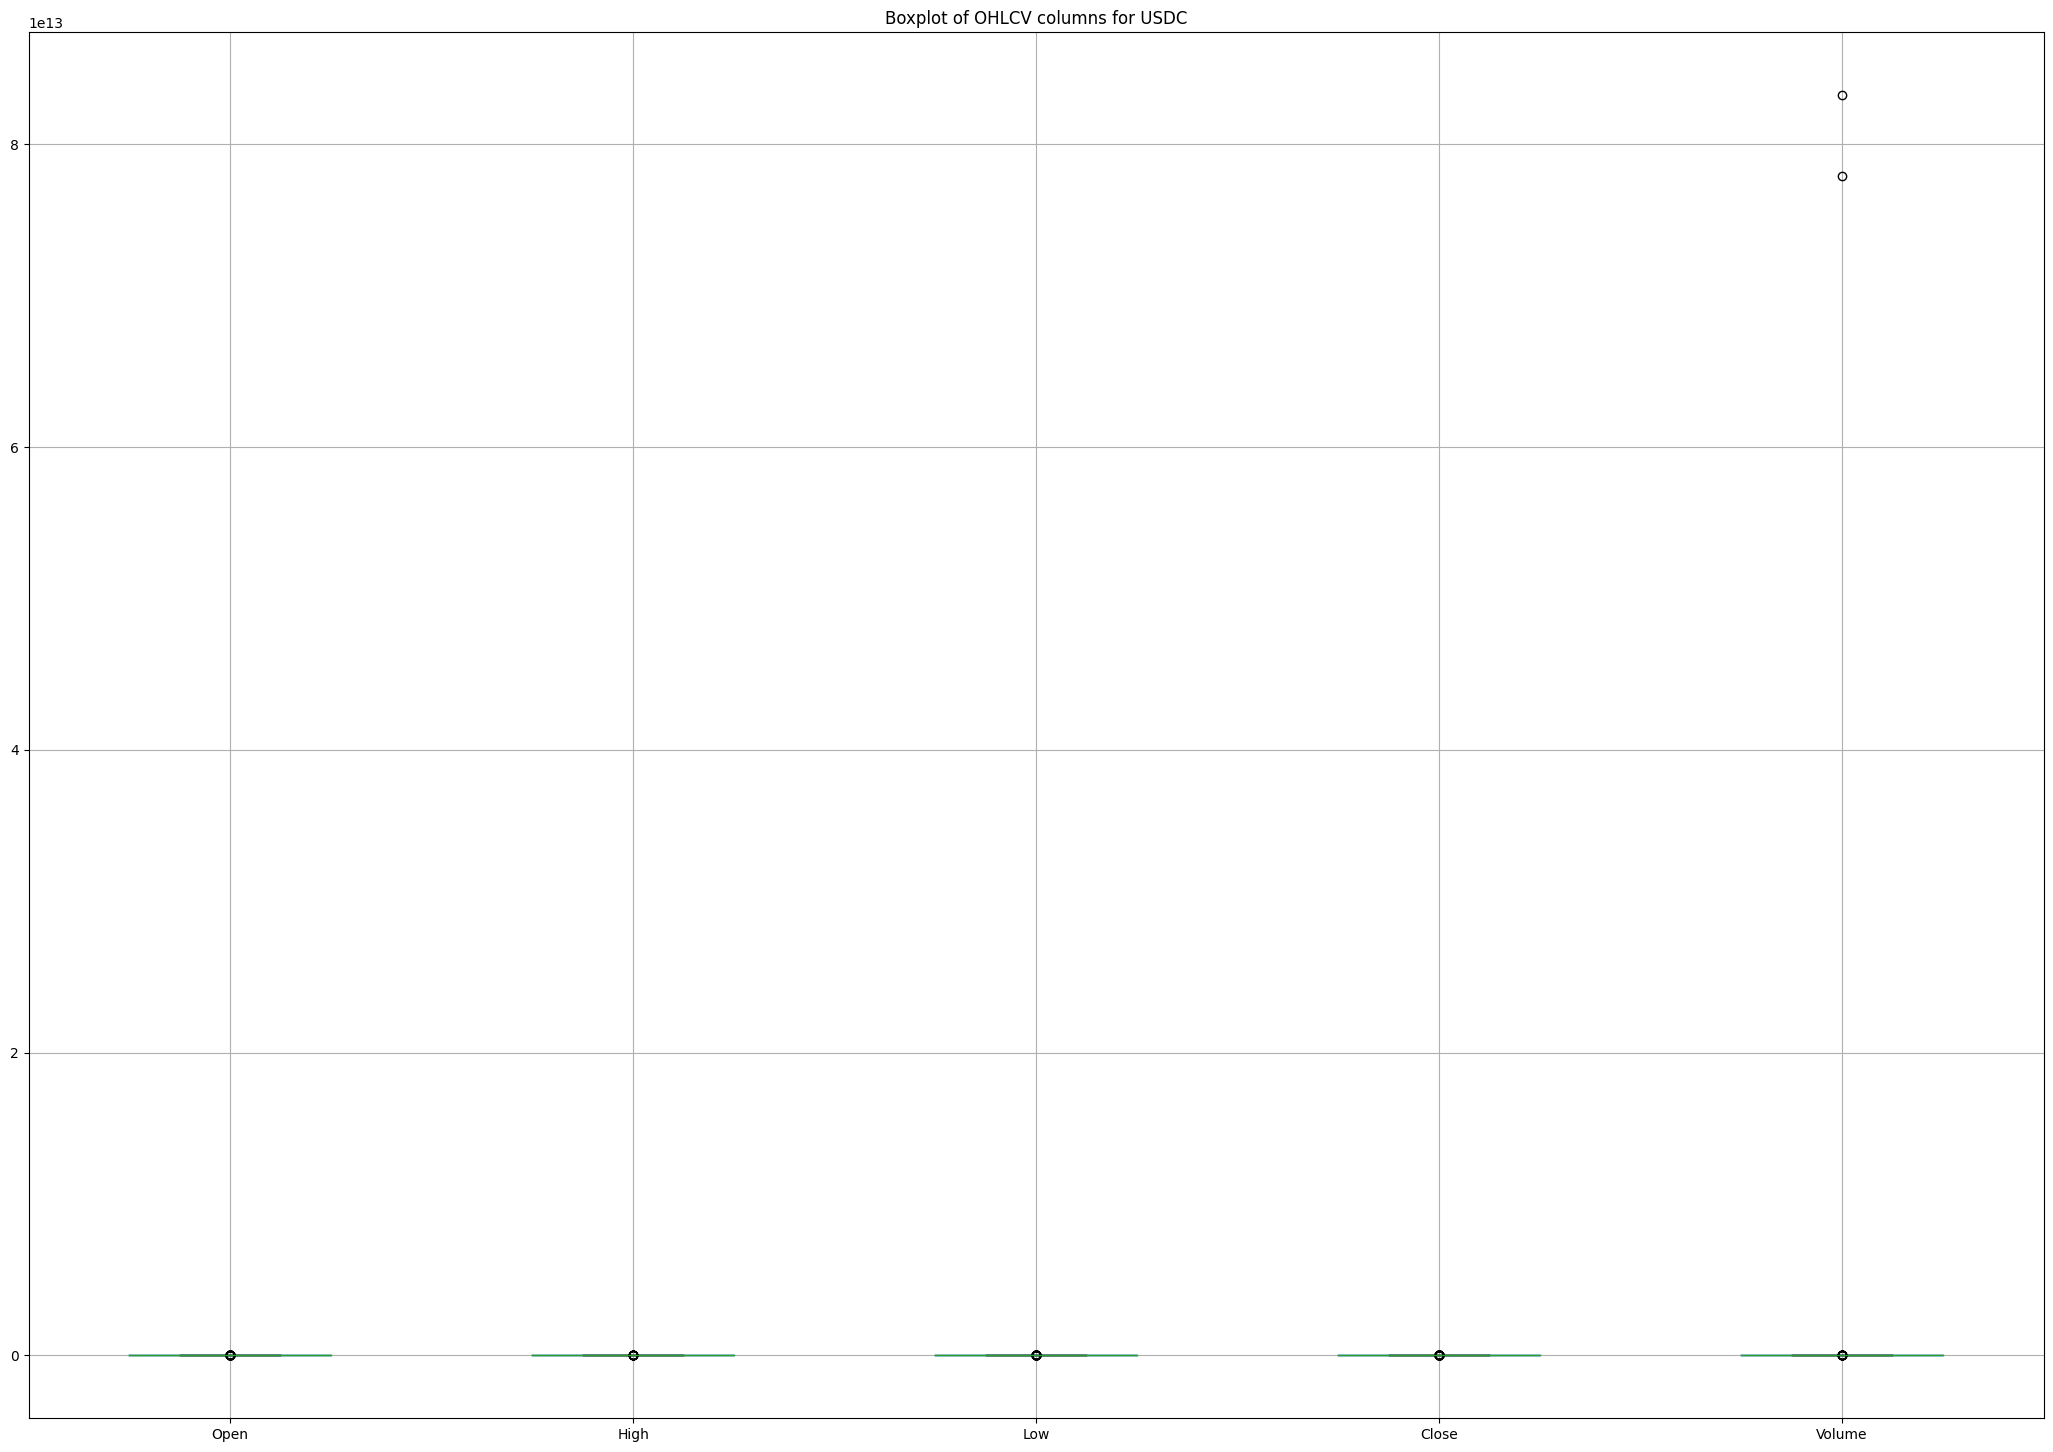


Lido Staked Ether Historical Data with Changes:
                   Open         High          Low        Close    Volume
Date                                                                    
2022-01-24  2536.353027  2536.353027  2159.159912  2433.410645  38698733
2022-01-25  2432.230225  2493.437744  2350.558350  2451.541016    514997
2022-01-26  2453.538330  2703.667969  2372.026123  2460.585938    899689
2022-01-27  2459.898438  2556.573730  2311.445312  2418.656494   1540749
2022-01-28  2418.514404  2550.725342  2353.447754  2539.661377   1089990


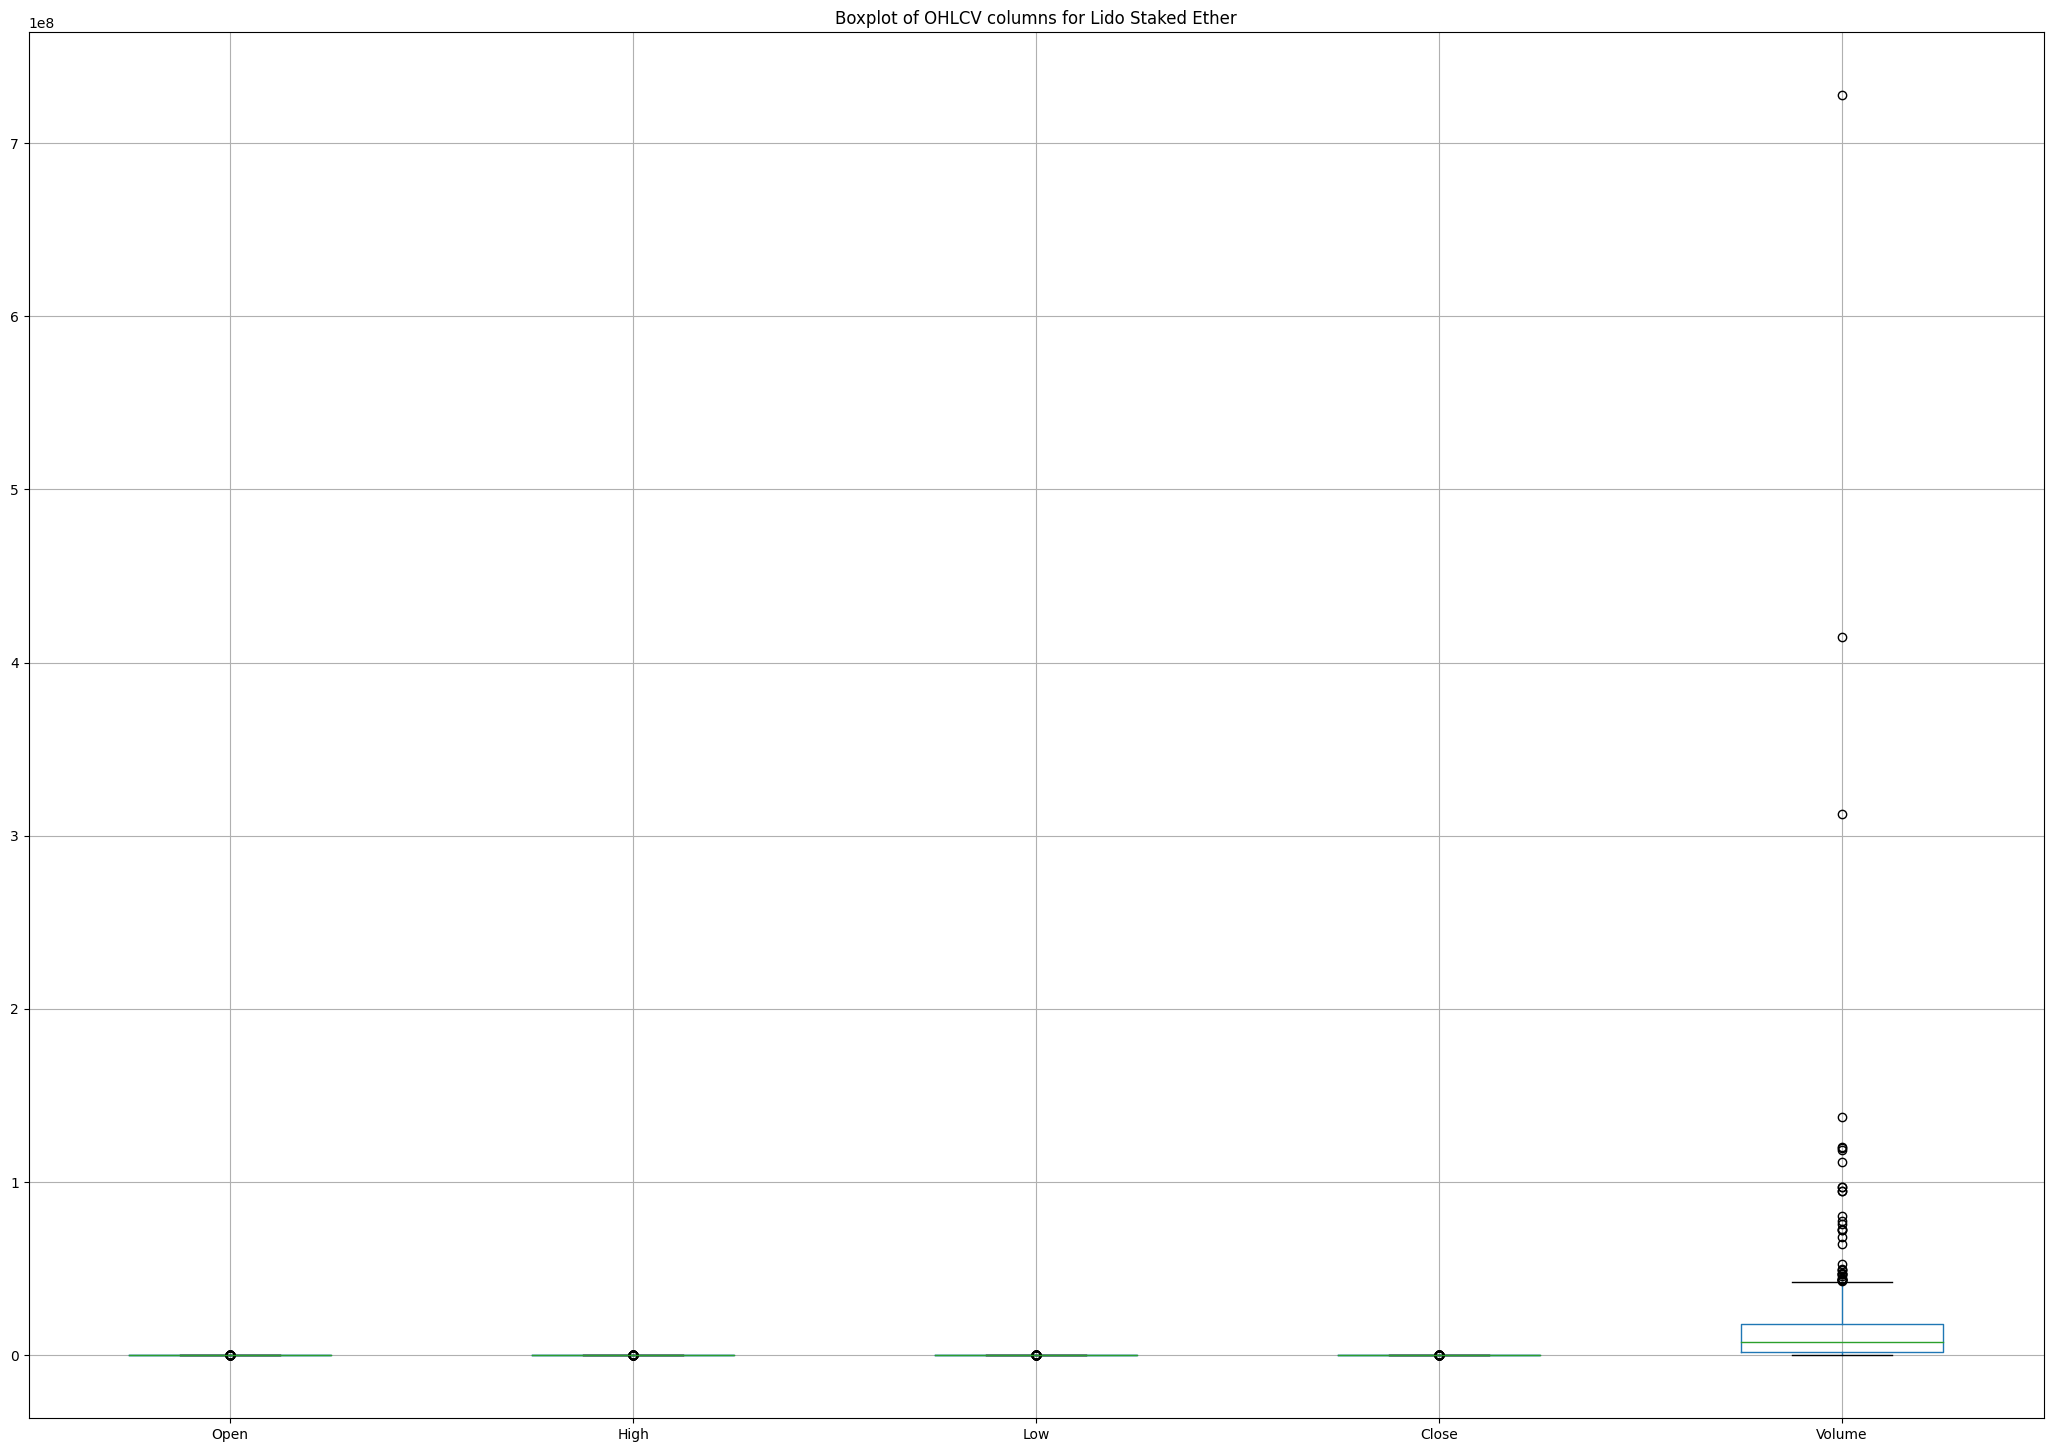


Cardano Historical Data with Changes:
                Open      High       Low     Close      Volume
Date                                                          
2022-01-24  1.122782  1.124338  0.959124  1.066598  3237316963
2022-01-25  1.066519  1.072024  0.998212  1.043574  1766326155
2022-01-26  1.043620  1.149648  1.026486  1.079047  2437592239
2022-01-27  1.078735  1.078735  1.009166  1.043533  1519972359
2022-01-28  1.043234  1.058343  1.014096  1.050606  1206550586


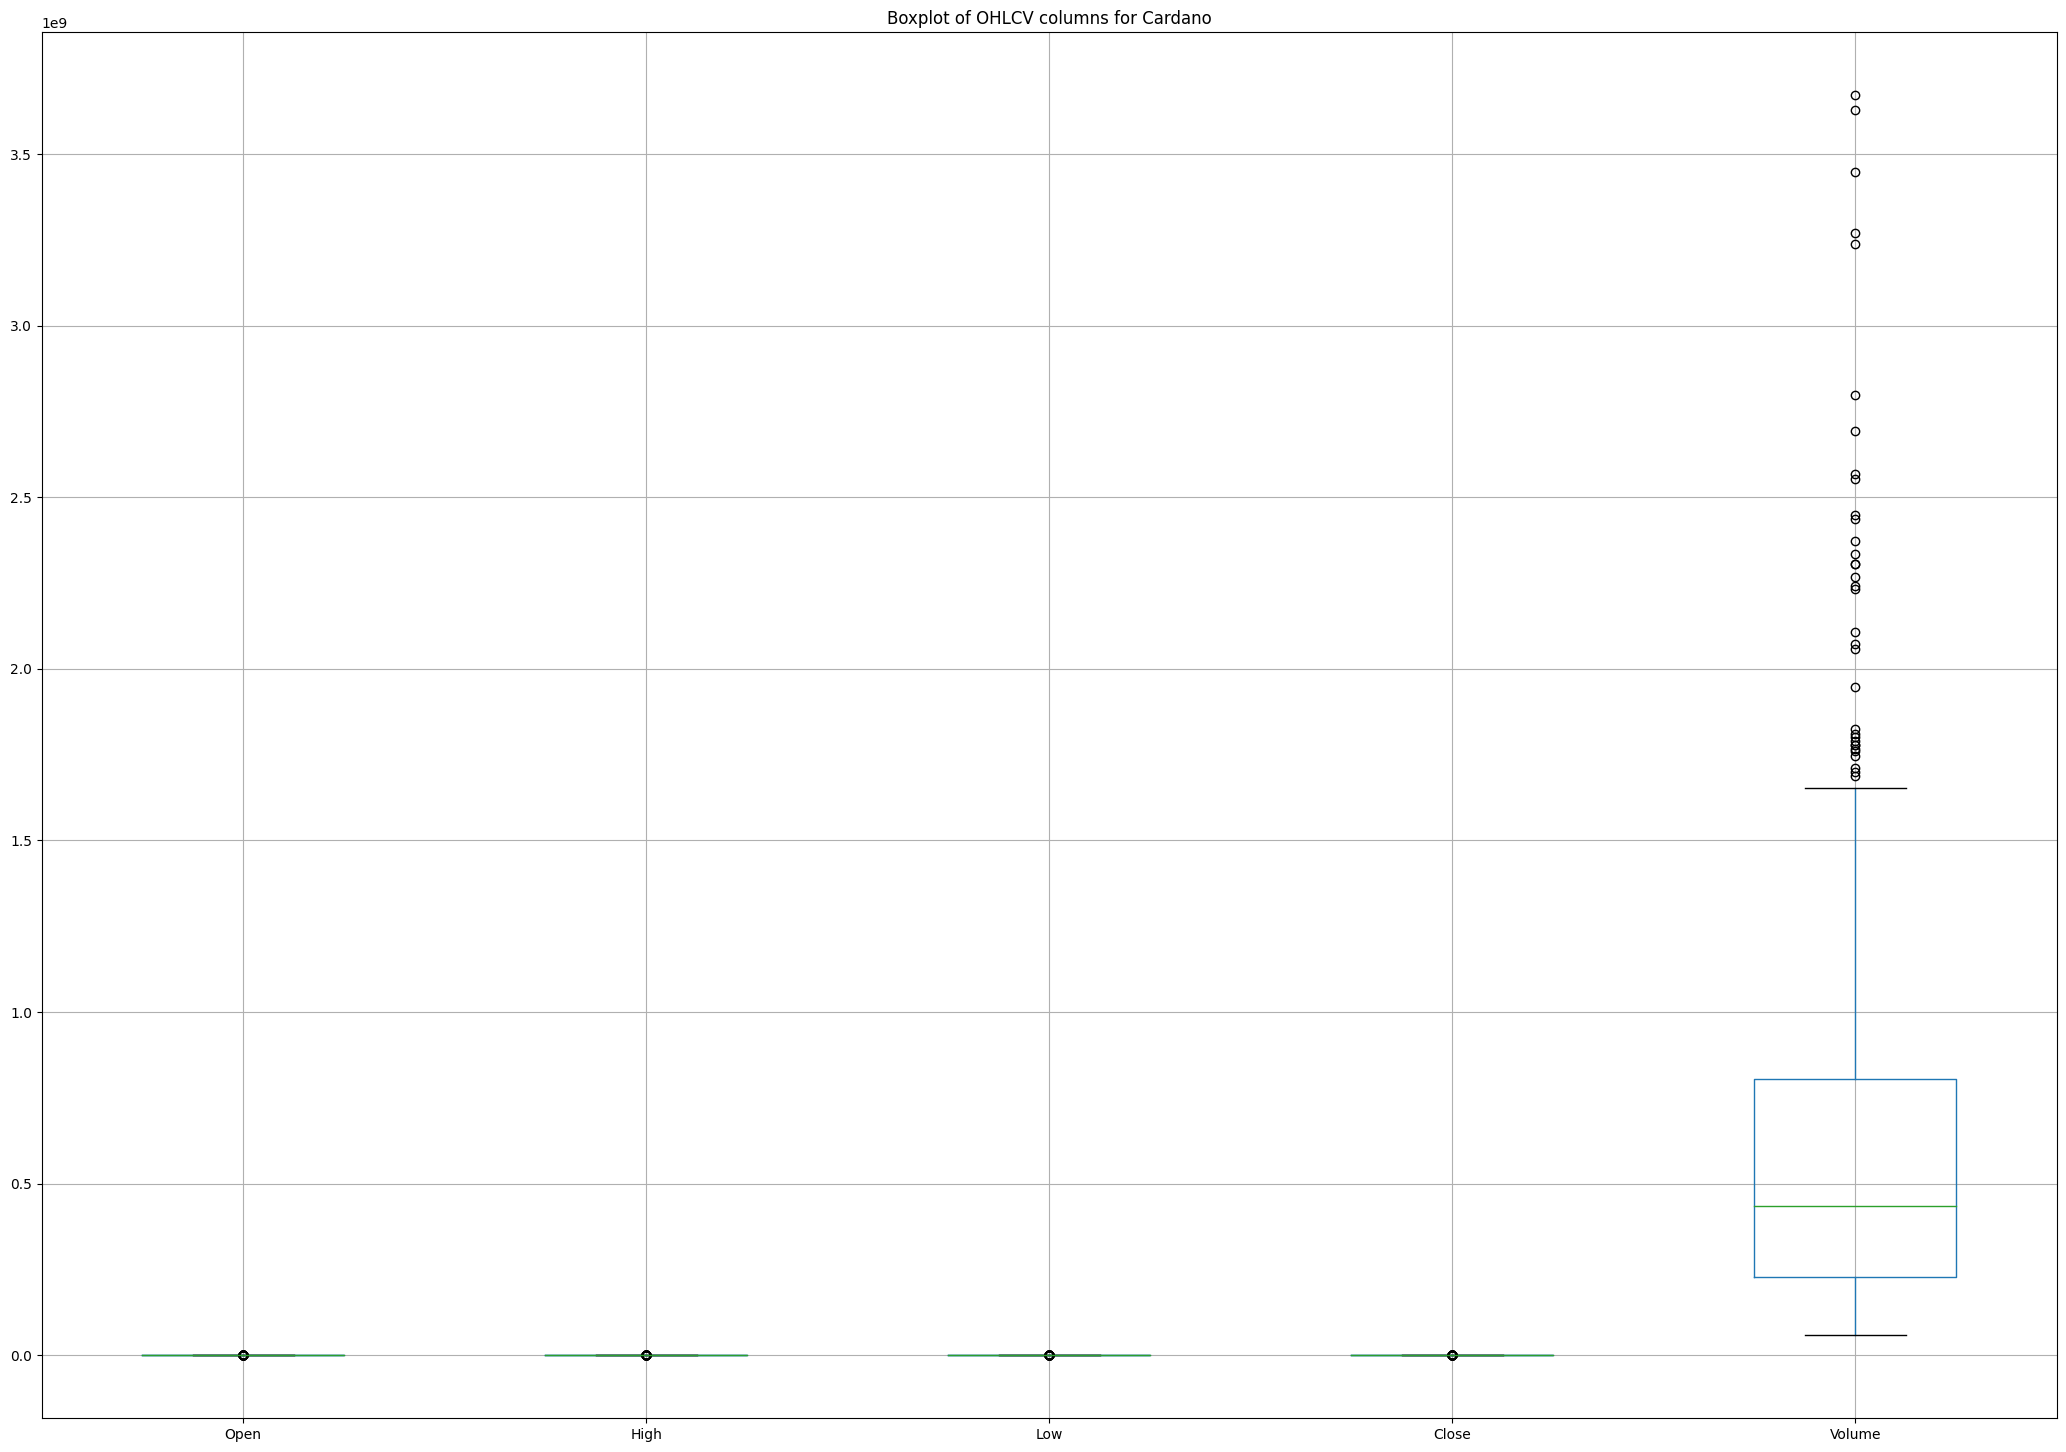

In [53]:
# Update all dataframes in crypto_dataframes
for crypto_name, data in crypto_dataframes.items():
    # Check if 'Date' column exists
    data.index = pd.to_datetime(data.index)

    # Remove 'Adj Close' column if it exists
    if 'Adj Close' in data.columns:
        data.drop(['Adj Close'], axis=1, inplace=True)

    # Display the first few rows with changes
    print(f"\n{crypto_name} Historical Data with Changes:")
    print(data.head())

    # Plot boxplot
    plt.figure(figsize=(26, 18))
    data.boxplot(column=['Open', 'High', 'Low', 'Close', 'Volume'])
    plt.title(f'Boxplot of OHLCV columns for {crypto_name}')
    plt.show()

In [54]:
for crypto_name, data in crypto_dataframes.items():

    # Display the first few rows with new columns
    print(f"\n{crypto_name} Historical Data with Returns and Direction:")
    print(data.head())


Bitcoin Historical Data with Returns and Direction:
                    Open          High           Low         Close  \
Date                                                                 
2022-01-24  36275.734375  37247.519531  33184.058594  36654.328125   
2022-01-25  36654.804688  37444.570312  35779.429688  36954.003906   
2022-01-26  36950.515625  38825.410156  36374.906250  36852.121094   
2022-01-27  36841.878906  37148.324219  35629.281250  37138.234375   
2022-01-28  37128.445312  37952.878906  36211.109375  37784.332031   

                 Volume  
Date                     
2022-01-24  41856658597  
2022-01-25  26428189594  
2022-01-26  31324598034  
2022-01-27  25041426629  
2022-01-28  22238830523  

Ethereum Historical Data with Returns and Direction:
                   Open         High          Low        Close       Volume
Date                                                                       
2022-01-24  2535.891113  2537.208496  2172.301270  2440.352295  2822


Bitcoin Historical Data after Z-Score Filtering:
                    Open          High           Low         Close  \
Date                                                                 
2022-01-24  36275.734375  37247.519531  33184.058594  36654.328125   
2022-01-25  36654.804688  37444.570312  35779.429688  36954.003906   
2022-01-26  36950.515625  38825.410156  36374.906250  36852.121094   
2022-01-27  36841.878906  37148.324219  35629.281250  37138.234375   
2022-01-28  37128.445312  37952.878906  36211.109375  37784.332031   

                 Volume  
Date                     
2022-01-24  41856658597  
2022-01-25  26428189594  
2022-01-26  31324598034  
2022-01-27  25041426629  
2022-01-28  22238830523  


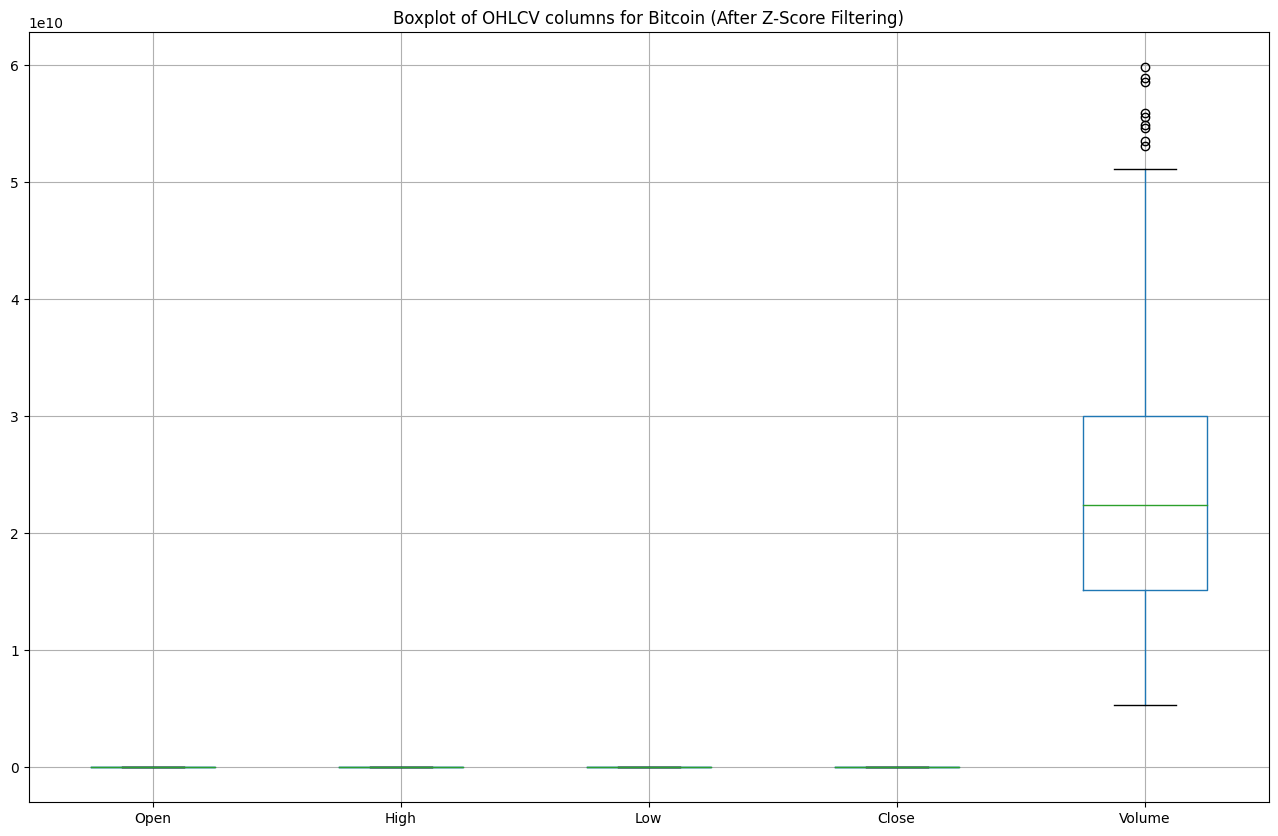


Ethereum Historical Data after Z-Score Filtering:
                   Open         High          Low        Close       Volume
Date                                                                       
2022-01-24  2535.891113  2537.208496  2172.301270  2440.352295  28220804648
2022-01-25  2440.393555  2498.507080  2359.384766  2455.935059  16179776932
2022-01-26  2455.579102  2705.784180  2417.683105  2468.030273  21229909340
2022-01-27  2467.188477  2510.451660  2328.452148  2423.001221  16126522783
2022-01-28  2421.646973  2548.778564  2367.833740  2547.092041  14666227351


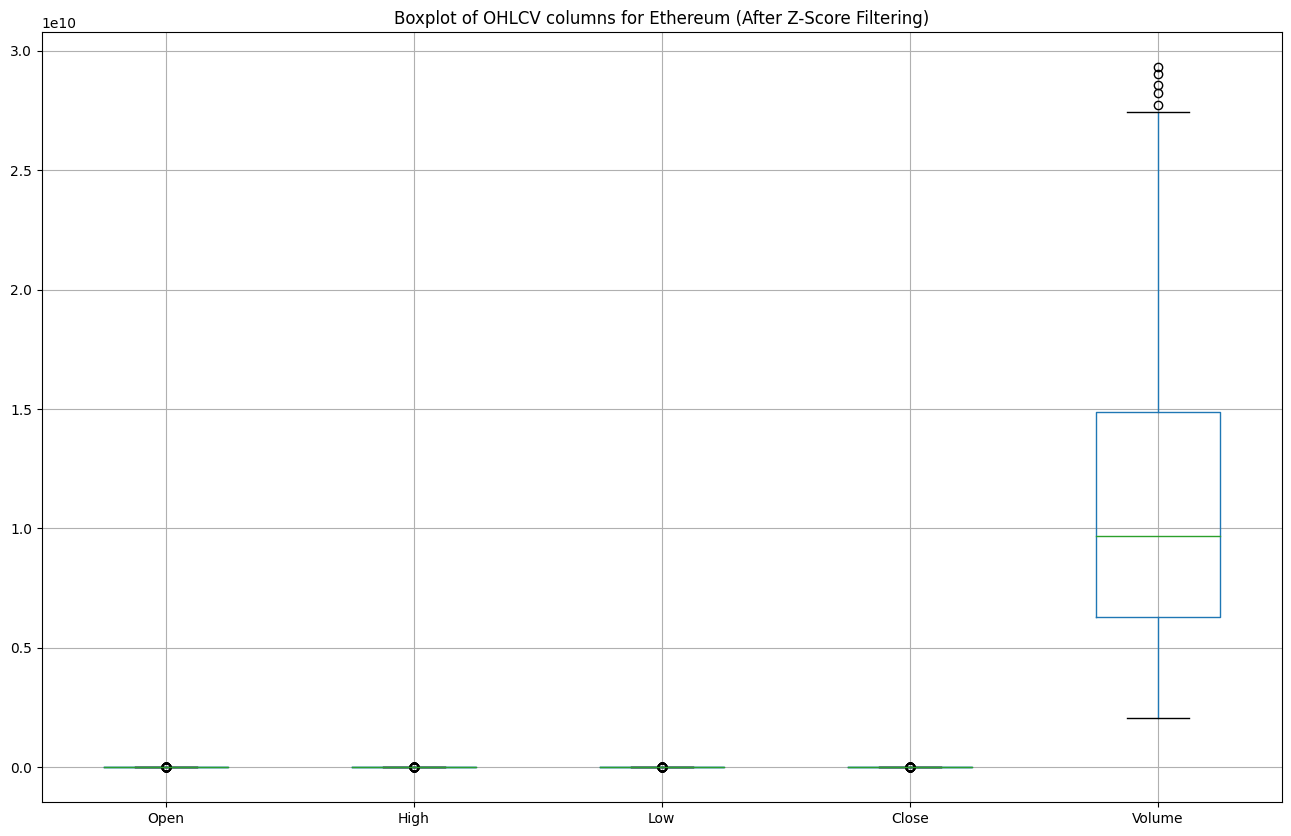


Tether Historical Data after Z-Score Filtering:
                Open      High       Low     Close       Volume
Date                                                           
2022-01-24  1.000498  1.001062  1.000108  1.000439  88845381041
2022-01-25  1.000442  1.000902  1.000169  1.000604  58560287216
2022-01-26  1.000595  1.001117  1.000290  1.000630  70750980627
2022-01-27  1.000632  1.000859  1.000207  1.000344  53950927548
2022-01-28  1.000343  1.000723  1.000151  1.000345  50688257403


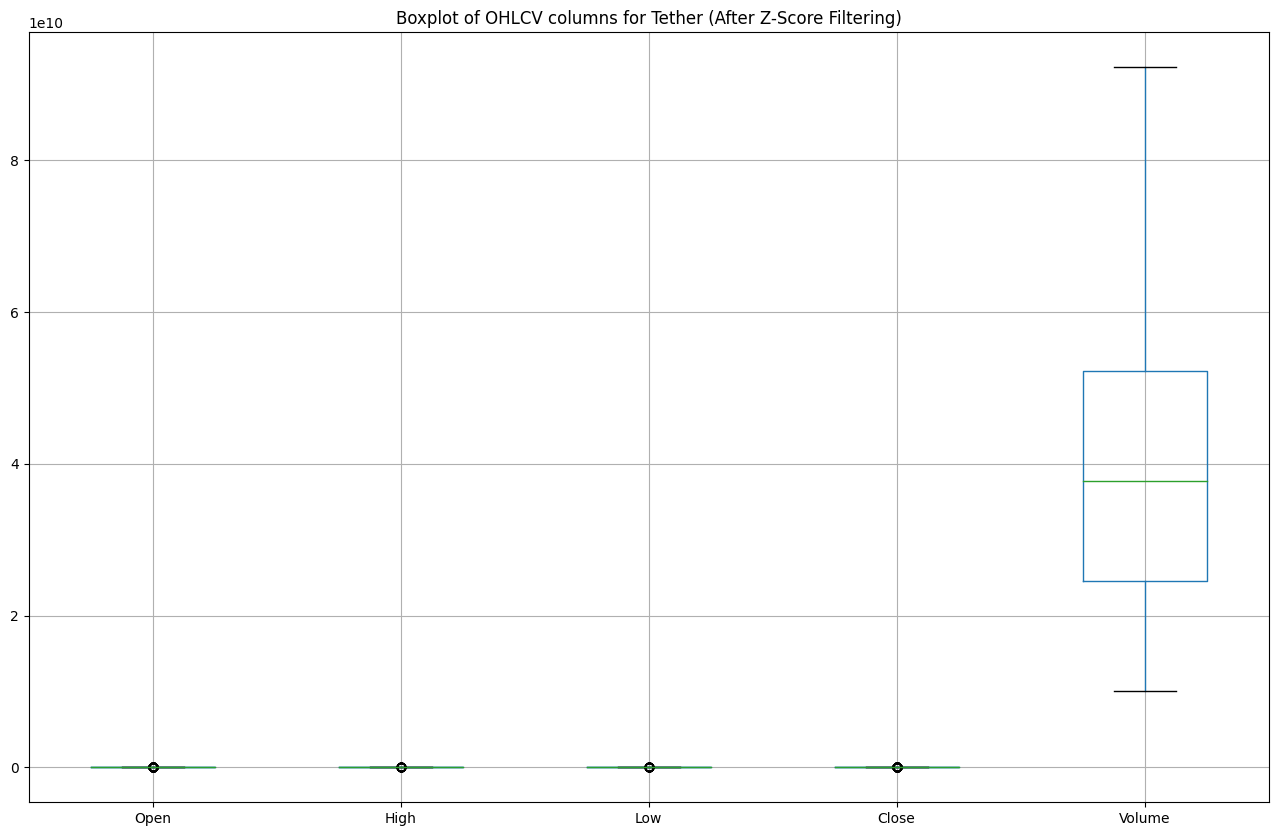


BNB Historical Data after Z-Score Filtering:
                  Open        High         Low       Close      Volume
Date                                                                  
2022-01-25  371.386841  387.176849  358.083557  384.619354  2325661159
2022-01-26  384.586243  400.152069  367.575104  375.755463  2226973227
2022-01-27  375.542175  391.804382  360.331696  390.088287  1952844398
2022-01-28  390.000671  393.375580  376.752167  386.084381  1592850476
2022-01-29  386.065735  396.772278  381.683777  389.132782  1330610935


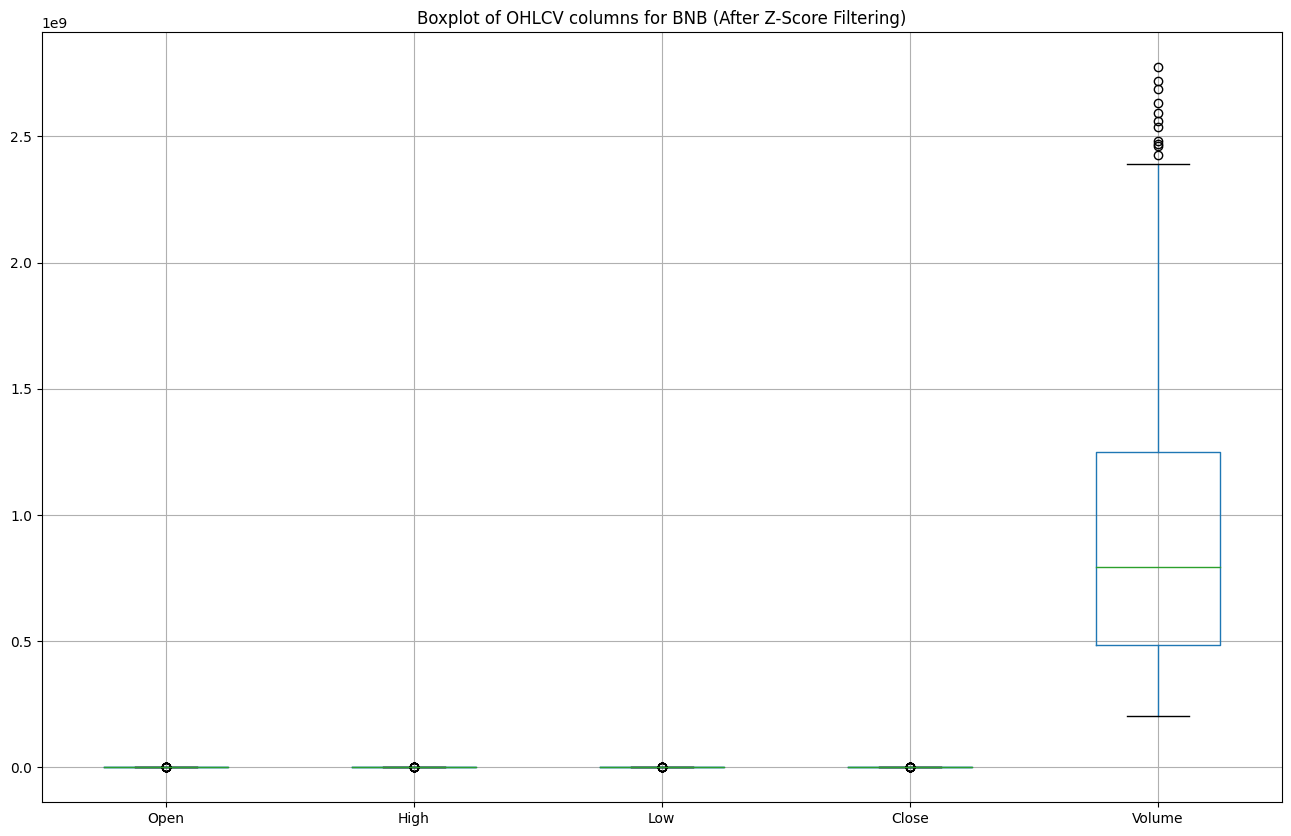


Solana Historical Data after Z-Score Filtering:
                 Open        High        Low      Close      Volume
Date                                                               
2022-01-25  91.660156   99.701233  87.757126  94.720352  2842652332
2022-01-26  94.718834  103.721558  89.807556  92.238045  3177186515
2022-01-27  92.218056   94.059998  86.186035  89.632492  2513945822
2022-01-28  89.529091   93.364670  87.574242  91.312897  2156098049
2022-01-29  91.354698   98.611046  90.963799  96.223488  1727329992


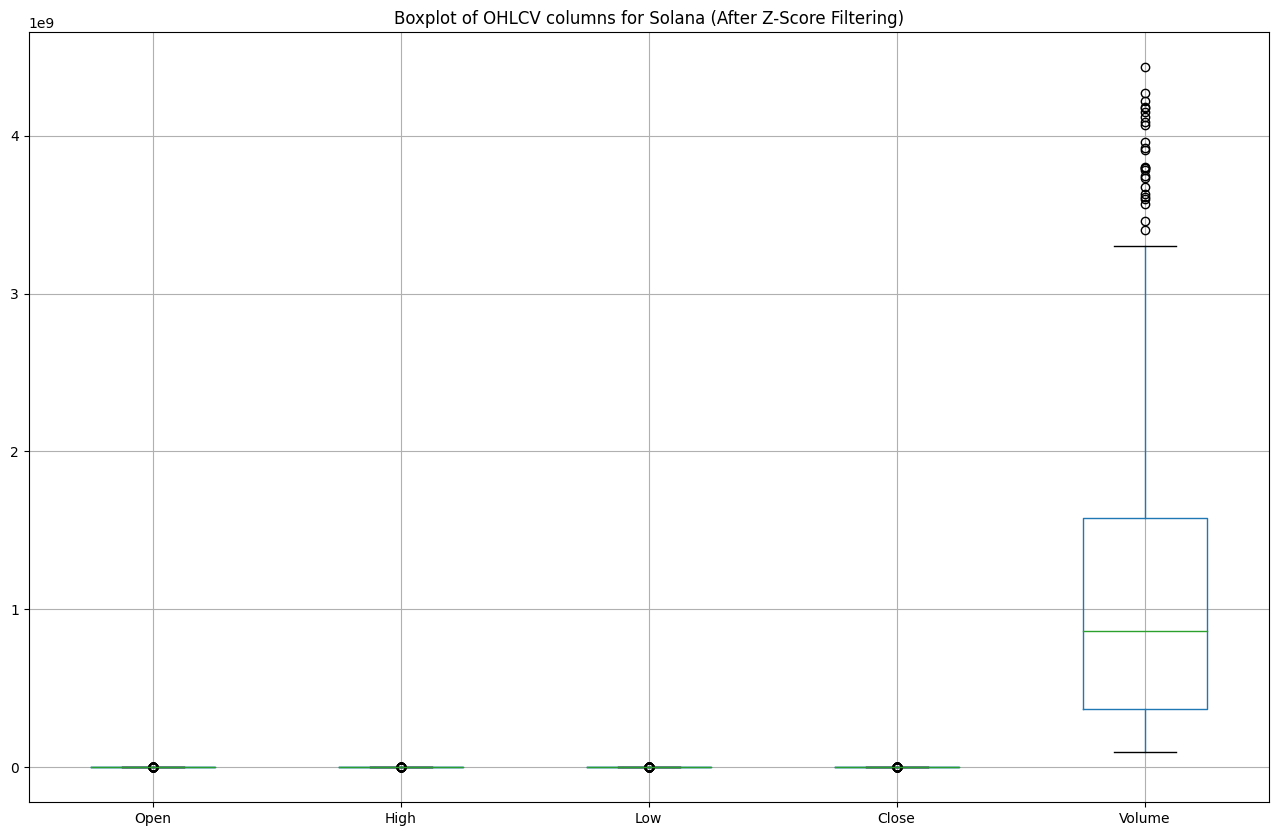


XRP Historical Data after Z-Score Filtering:
                Open      High       Low     Close      Volume
Date                                                          
2022-01-24  0.628770  0.628770  0.558668  0.612139  2759980202
2022-01-25  0.612144  0.621229  0.589888  0.617563  1731121388
2022-01-26  0.617544  0.652549  0.608588  0.622072  2302112575
2022-01-27  0.621945  0.623508  0.591465  0.608770  1586137620
2022-01-28  0.608619  0.612861  0.593397  0.612512  1318006848


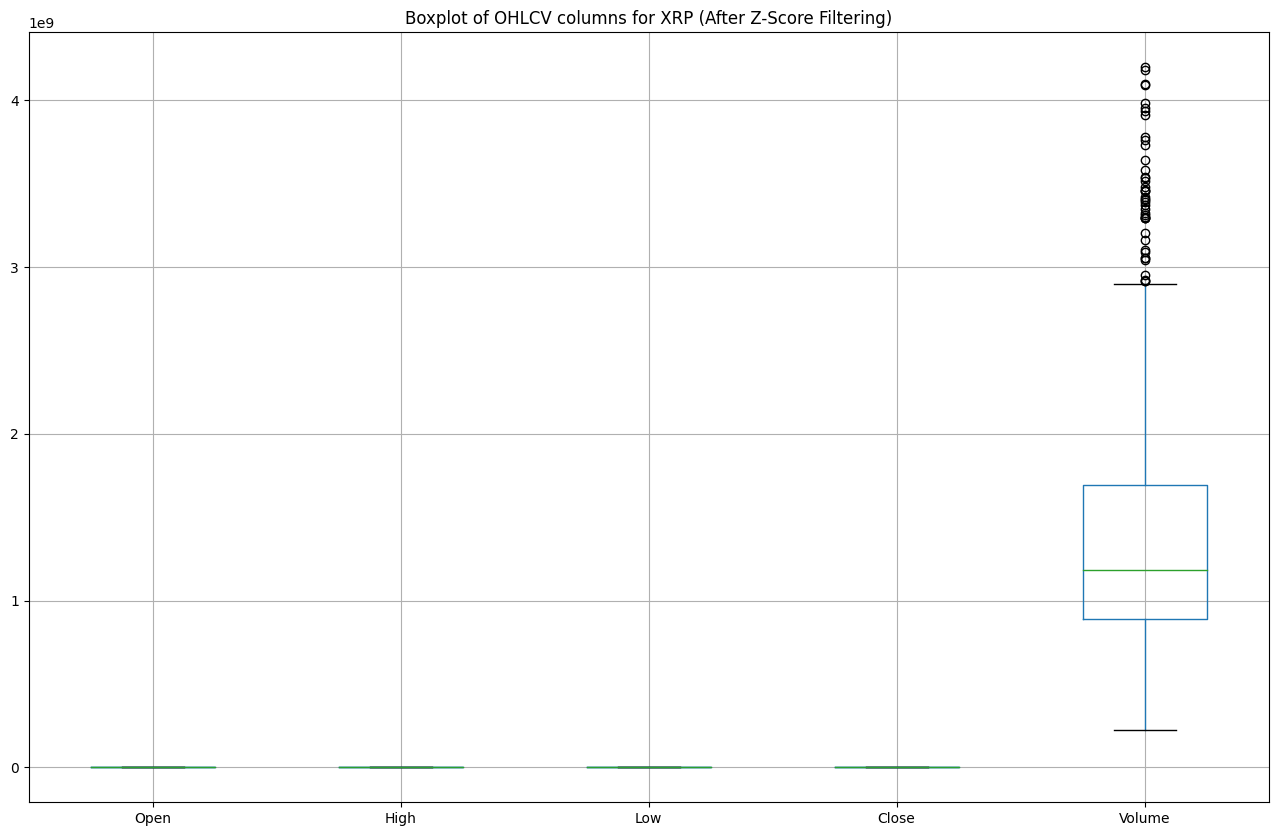


USDC Historical Data after Z-Score Filtering:
                Open      High       Low     Close      Volume
Date                                                          
2022-01-24  1.000170  1.000990  0.999131  1.000305  7468827146
2022-01-25  1.000318  1.001090  0.999031  1.000429  4146328235
2022-01-27  0.999850  1.001183  0.998923  0.999776  5023632111
2022-01-28  0.999749  1.001276  0.998969  0.999651  4809047239
2022-01-30  1.000405  1.000751  0.999196  1.000065  2333906963


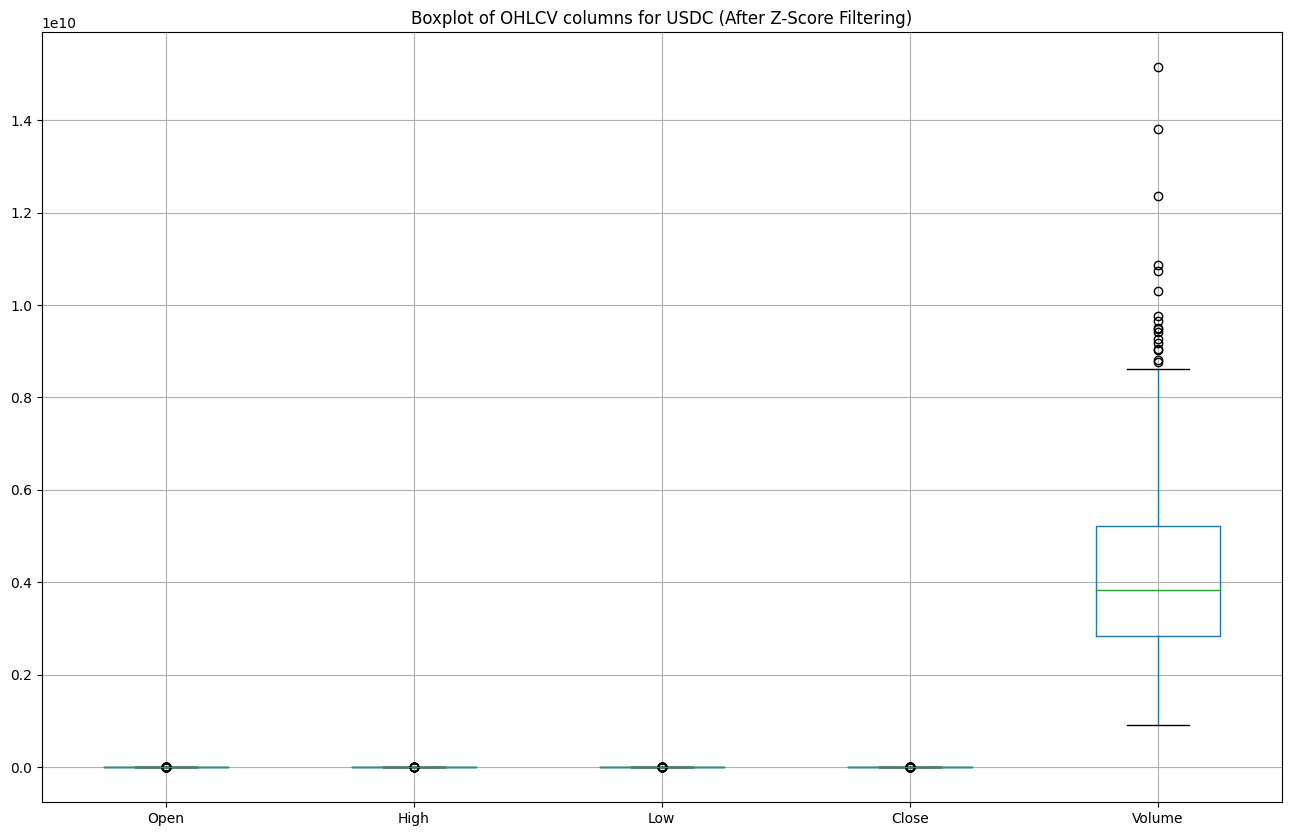


Lido Staked Ether Historical Data after Z-Score Filtering:
                   Open         High          Low        Close    Volume
Date                                                                    
2022-01-24  2536.353027  2536.353027  2159.159912  2433.410645  38698733
2022-01-25  2432.230225  2493.437744  2350.558350  2451.541016    514997
2022-01-26  2453.538330  2703.667969  2372.026123  2460.585938    899689
2022-01-27  2459.898438  2556.573730  2311.445312  2418.656494   1540749
2022-01-28  2418.514404  2550.725342  2353.447754  2539.661377   1089990


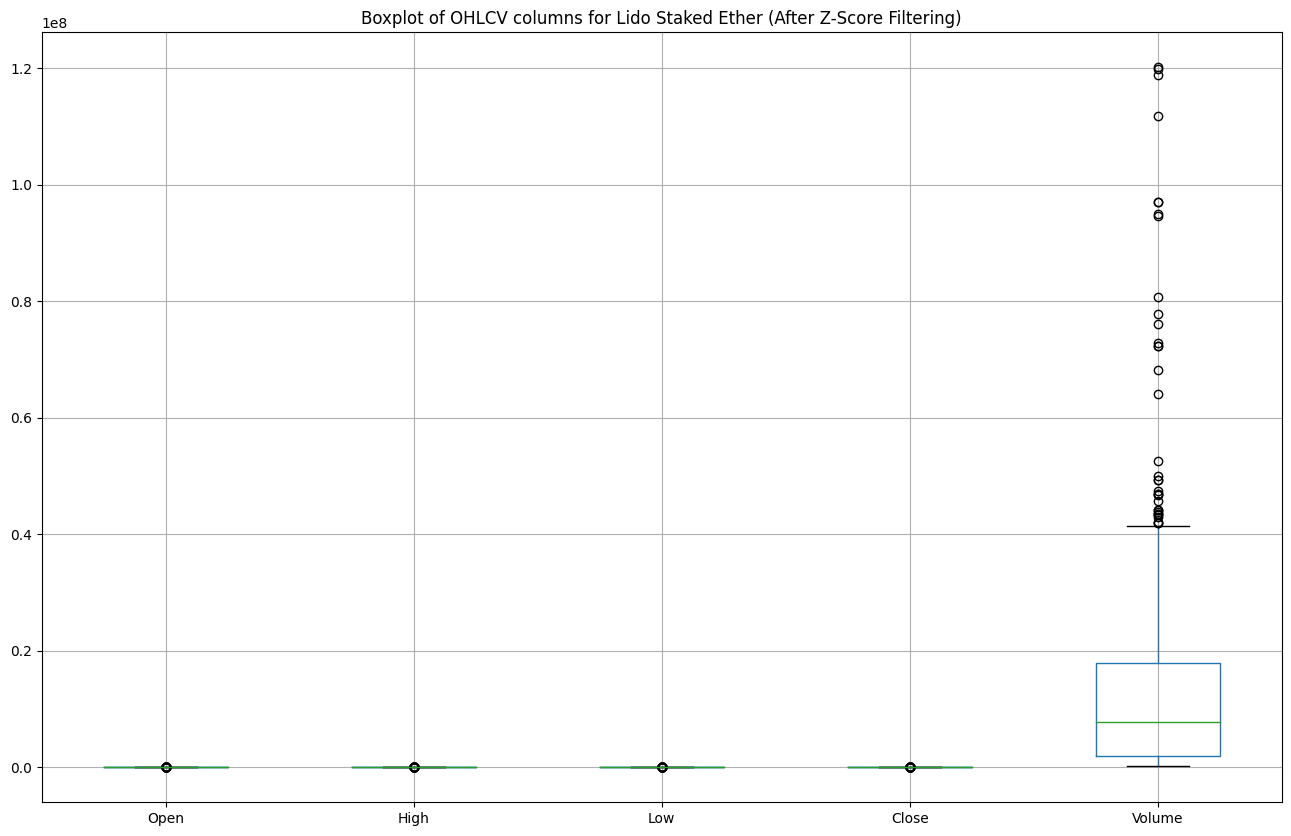


Cardano Historical Data after Z-Score Filtering:
                Open      High       Low     Close      Volume
Date                                                          
2022-01-25  1.066519  1.072024  0.998212  1.043574  1766326155
2022-01-27  1.078735  1.078735  1.009166  1.043533  1519972359
2022-01-28  1.043234  1.058343  1.014096  1.050606  1206550586
2022-01-29  1.050492  1.080614  1.041647  1.059570   913122499
2022-01-30  1.059748  1.075346  1.028418  1.037473   748084610


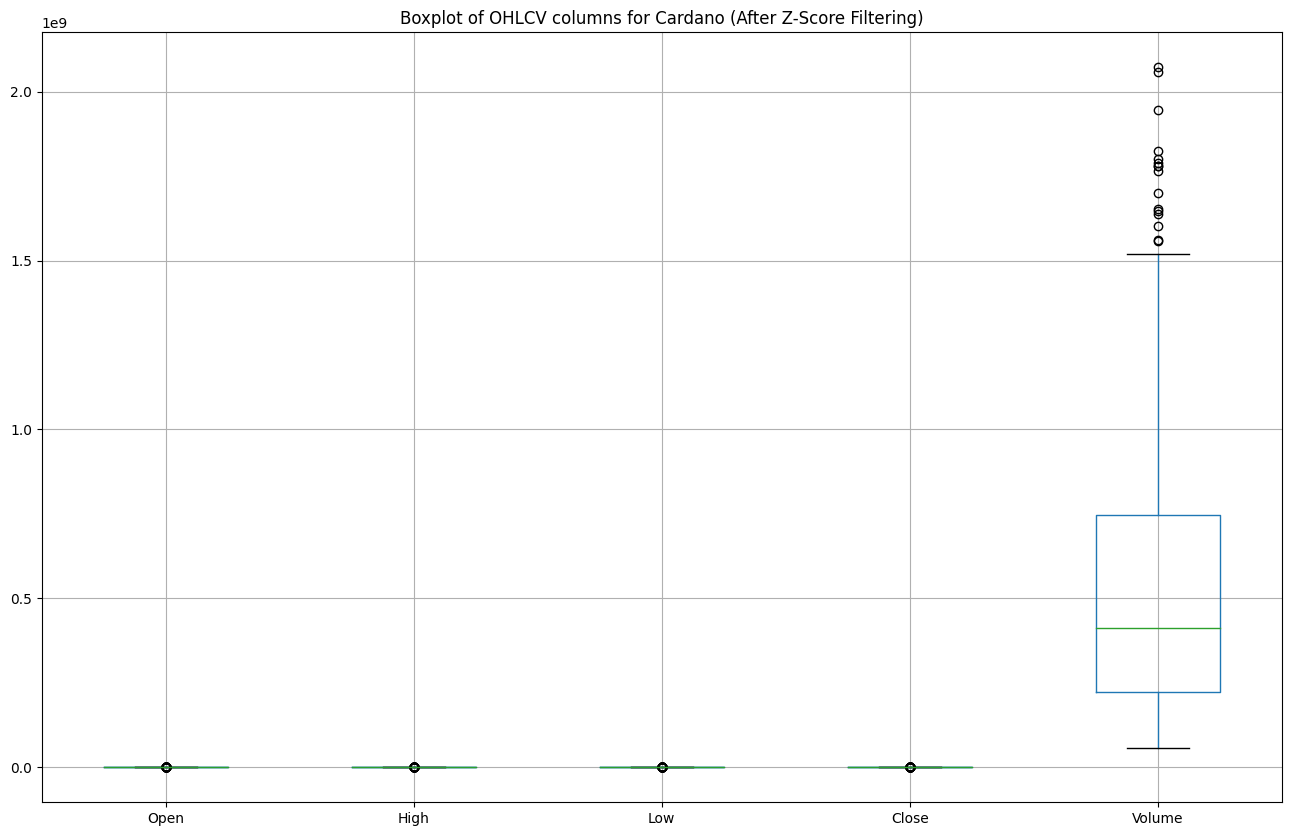

In [55]:


# Calculate Z-Scores and filter for all dataframes in crypto_dataframes
for crypto_name, data in crypto_dataframes.items():
    # Numeric columns to avoid Datetime column
    numeric_cols = data.select_dtypes(include=[np.number]).columns

    # Calculate Z-Scores
    z_scores = data[numeric_cols].apply(zscore)

    # Absolute Z-Scores
    abs_z_scores = np.abs(z_scores)

    # Filter entries
    filtered_entries = (abs_z_scores < 3).all(axis=1)

    # Apply the filter to the dataframe
    data = data[filtered_entries]

    # Display the first few rows after filtering
    print(f"\n{crypto_name} Historical Data after Z-Score Filtering:")
    print(data.head())

    # Plot boxplot for the filtered data
    plt.figure(figsize=(16, 10))
    data.boxplot(column=['Open', 'High', 'Low', 'Close', 'Volume'])
    plt.title(f'Boxplot of OHLCV columns for {crypto_name} (After Z-Score Filtering)')
    plt.show()


In [56]:
# Calculate 'returns' and 'direction' for each dataframe in crypto_dataframes
for crypto_name, data in crypto_dataframes.items():
    # Add 'returns' and 'direction' columns
    data['returns'] = np.log(data['Close'] / data['Close'].shift(1))  # calculates the pct returns
    data.dropna(inplace=True)  # drop rows with missing columns
    data['direction'] = np.sign(data['returns']).astype(int).shift(-1)  # assigns the changes a direction

    # Display the first few rows with new columns
    print(f"\n{crypto_name} Historical Data with Returns and Direction:")
    print(data[['Close', 'returns', 'direction']].head())



Bitcoin Historical Data with Returns and Direction:
                   Close   returns  direction
Date                                         
2022-01-25  36954.003906  0.008142       -1.0
2022-01-26  36852.121094 -0.002761        1.0
2022-01-27  37138.234375  0.007734        1.0
2022-01-28  37784.332031  0.017248        1.0
2022-01-29  38138.179688  0.009321       -1.0

Ethereum Historical Data with Returns and Direction:
                  Close   returns  direction
Date                                        
2022-01-25  2455.935059  0.006365        1.0
2022-01-26  2468.030273  0.004913       -1.0
2022-01-27  2423.001221 -0.018413        1.0
2022-01-28  2547.092041  0.049945        1.0
2022-01-29  2597.084717  0.019437        1.0

Tether Historical Data with Returns and Direction:
               Close       returns  direction
Date                                         
2022-01-25  1.000604  1.648997e-04        1.0
2022-01-26  1.000630  2.597160e-05       -1.0
2022-01-27  1.000344

In [57]:
# Calculate percent change in volume for all dataframes in crypto_dataframes
for crypto_name, data in crypto_dataframes.items():
    # Calculate percent change in volume
    data['pct_change_v'] = np.log(data['Volume'] / data['Volume'].shift(1))

    # Drop rows with None values
    data.dropna(inplace=True)

    # Display the first few rows after calculating percent change
    print(f"\n{crypto_name} Historical Data with Percent Change in Volume:")
    print(data.head(5))


Bitcoin Historical Data with Percent Change in Volume:
                    Open          High           Low         Close  \
Date                                                                 
2022-01-26  36950.515625  38825.410156  36374.906250  36852.121094   
2022-01-27  36841.878906  37148.324219  35629.281250  37138.234375   
2022-01-28  37128.445312  37952.878906  36211.109375  37784.332031   
2022-01-29  37780.714844  38576.261719  37406.472656  38138.179688   
2022-01-30  38151.917969  38266.339844  37437.710938  37917.601562   

                 Volume   returns  direction  pct_change_v  
Date                                                        
2022-01-26  31324598034 -0.002761        1.0      0.169972  
2022-01-27  25041426629  0.007734        1.0     -0.223872  
2022-01-28  22238830523  0.017248        1.0     -0.118692  
2022-01-29  17194183075  0.009321       -1.0     -0.257269  
2022-01-30  14643548444 -0.005800        1.0     -0.160571  

Ethereum Historical Data 

In [58]:
# The number of lags we introduce in the data
lags = [1, 2, 3, 4, 5, 6, 7, 8]

In [59]:

# Compute lagged log returns on the close price and percent change in volume
for crypto_name, data in crypto_dataframes.items():
    # Lagged log returns on the close price
    rtn_cols = []
    for lag in lags:
        rtn_col = f'rtn_lag{lag}'
        data[rtn_col] = np.log(data['Close'] / data['Close'].shift(lag))
        rtn_cols.append(rtn_col)

    # Drop rows with None values
    data.dropna(inplace=True)


    # Lagged percent change in volume
    vol_cols = []
    for lag in lags:
        vol_col = f'v_lag{lag}'
        data[vol_col] = data['pct_change_v'].shift(lag)
        vol_cols.append(vol_col)

    # Drop rows with None values
    data.dropna(inplace=True)

    # Display the first few rows after introducing lagged percent change in volume
    print(f"\n{crypto_name} Historical Data with Lagged Percent Change in Volume:")
    print(data.head(2))



Bitcoin Historical Data with Lagged Percent Change in Volume:
                    Open          High           Low        Close  \
Date                                                                
2022-02-11  43571.128906  43810.832031  42114.539062  42407.93750   
2022-02-12  42412.300781  42992.550781  41852.574219  42244.46875   

                 Volume   returns  direction  pct_change_v  rtn_lag1  \
Date                                                                   
2022-02-11  26954925781 -0.026921       -1.0     -0.175999 -0.026921   
2022-02-12  18152390304 -0.003862       -1.0     -0.395364 -0.003862   

            rtn_lag2  ...  rtn_lag7  rtn_lag8    v_lag1    v_lag2    v_lag3  \
Date                  ...                                                     
2022-02-11 -0.044525  ...  0.021621  0.132248  0.324037 -0.352782  0.144042   
2022-02-12 -0.030783  ...  0.019199  0.017759 -0.175999  0.324037 -0.352782   

              v_lag4    v_lag5    v_lag6    v_lag7    

In [60]:
# A Function to transform the lag returns to binary values (0, +1)
def create_bins(data, cols, bins=[0]):
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)
    return cols_bin

# A Function to transform the lag volumes to binary values (0, +1)
def create_bins_v(data, vols, bins=[0]):
    vols_bin = []
    for vol in vols:
        vol_bin = vol + '_bin'
        data[vol_bin] = np.digitize(data[vol], bins=bins)
        vols_bin.append(vol_bin)
    return vols_bin

# Apply the functions to all dataframes in crypto_dataframes
for crypto_name, data in crypto_dataframes.items():
    # Apply for lag returns
    bins_returns = [0]
    cols_bin_returns = create_bins(data, rtn_cols, bins=bins_returns)

    # Display the first few rows after transforming lag returns to binary values
    print(f"\n{crypto_name} Historical Data with Transformed Lag Returns:")
    print(data[rtn_cols + cols_bin_returns].head(2))

    # Apply for lag volumes
    bins_volumes = [0]
    vols_bin = create_bins_v(data, vol_cols, bins=bins_volumes)

    # Display the first few rows after transforming lag volumes to binary values
    print(f"\n{crypto_name} Historical Data with Transformed Lag Volumes:")
    print(data[vol_cols + vols_bin].head(2))



Bitcoin Historical Data with Transformed Lag Returns:
            rtn_lag1  rtn_lag2  rtn_lag3  rtn_lag4  rtn_lag5  rtn_lag6  \
Date                                                                     
2022-02-11 -0.026921 -0.044525 -0.039542 -0.033218 -0.000106  0.023061   
2022-02-12 -0.003862 -0.030783 -0.048387 -0.043405 -0.037080 -0.003968   

            rtn_lag7  rtn_lag8  rtn_lag1_bin  rtn_lag2_bin  rtn_lag3_bin  \
Date                                                                       
2022-02-11  0.021621  0.132248             0             0             0   
2022-02-12  0.019199  0.017759             0             0             0   

            rtn_lag4_bin  rtn_lag5_bin  rtn_lag6_bin  rtn_lag7_bin  \
Date                                                                 
2022-02-11             0             0             1             1   
2022-02-12             0             0             0             1   

            rtn_lag8_bin  
Date                      
2022-02-

In [61]:
# Print cols_bin for each dataframe in crypto_dataframes
for crypto_name, data in crypto_dataframes.items():
    # Concatenate the bin columns
    cols_bin = cols_bin_returns + vols_bin

    # Display the bin columns
    print(f"\n{crypto_name} Bin Columns:")
    print(cols_bin)

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Display the dataframe after dropping rows
    print(f"\n{crypto_name} Historical Data after Dropping Rows with Missing Values:")
    print(data)



Bitcoin Bin Columns:
['rtn_lag1_bin', 'rtn_lag2_bin', 'rtn_lag3_bin', 'rtn_lag4_bin', 'rtn_lag5_bin', 'rtn_lag6_bin', 'rtn_lag7_bin', 'rtn_lag8_bin', 'v_lag1_bin', 'v_lag2_bin', 'v_lag3_bin', 'v_lag4_bin', 'v_lag5_bin', 'v_lag6_bin', 'v_lag7_bin', 'v_lag8_bin']

Bitcoin Historical Data after Dropping Rows with Missing Values:
                    Open          High           Low         Close  \
Date                                                                 
2022-02-11  43571.128906  43810.832031  42114.539062  42407.937500   
2022-02-12  42412.300781  42992.550781  41852.574219  42244.468750   
2022-02-13  42236.566406  42693.054688  41950.941406  42197.515625   
2022-02-14  42157.398438  42775.777344  41681.957031  42586.917969   
2022-02-15  42586.464844  44667.218750  42491.035156  44575.203125   
...                  ...           ...           ...           ...   
2024-01-18  42742.312500  42876.347656  40631.171875  41262.058594   
2024-01-19  41278.460938  42134.160156  4

In [62]:
for crypto_name, data in crypto_dataframes.items():
  print(f"\n{crypto_name}")
  print(np.shape(data[cols_bin]))


Bitcoin
(711, 16)

Ethereum
(711, 16)

Tether
(711, 16)

BNB
(711, 16)

Solana
(711, 16)

XRP
(711, 16)

USDC
(711, 16)

Lido Staked Ether
(711, 16)

Cardano
(711, 16)


In [63]:
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'returns', 'direction',
       'pct_change_v', 'rtn_lag1', 'rtn_lag2', 'rtn_lag3', 'rtn_lag4',
       'rtn_lag5', 'rtn_lag6', 'rtn_lag7', 'rtn_lag8', 'v_lag1', 'v_lag2',
       'v_lag3', 'v_lag4', 'v_lag5', 'v_lag6', 'v_lag7', 'v_lag8',
       'rtn_lag1_bin', 'rtn_lag2_bin', 'rtn_lag3_bin', 'rtn_lag4_bin',
       'rtn_lag5_bin', 'rtn_lag6_bin', 'rtn_lag7_bin', 'rtn_lag8_bin',
       'v_lag1_bin', 'v_lag2_bin', 'v_lag3_bin', 'v_lag4_bin', 'v_lag5_bin',
       'v_lag6_bin', 'v_lag7_bin', 'v_lag8_bin'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Define strategy_rtn globally
strategy_rtn = []

# Define an empty dictionary to store models for each crypto
crypto_models = {}

# Function to fit Random Forest model for each dataframe
def fit_random_forest(data):
    model = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=3, n_estimators=395, criterion='entropy', min_samples_leaf=3, min_samples_split=8), n_estimators=100)  # You can adjust parameters as needed
    target_col = 'direction'  # Adjust as needed
    model.fit(data[cols_bin], data[target_col])
    return model

# Function to derive positions
def derive_positions(data, model):
    data['pos_random_forest'] = model.predict(data[cols_bin])

# Function to evaluate all trading strategies
def evaluate_strats(data, model, strategy_rtn, crypto_name):
    col = 'strategy_random_forest'
    data[col] = data['pos_random_forest'] * data['returns']
    strategy_rtn.append(col)

    # Insert 'returns' at the beginning of strategy_rtn
    strategy_rtn.insert(0, 'returns')

    # Display the dataframe after evaluating strategies
    print(f"\n{crypto_name} Historical Data with Evaluated Trading Strategies:")
    print(data[strategy_rtn])

# Loop through each dataframe in crypto_dataframes
for crypto_name, data in crypto_dataframes.items():
    iteration_strategy_rtn = []
    # Fit Random Forest model
    model = fit_random_forest(data)


    # Derive positions
    derive_positions(data, model)


    # Evaluate strategies
    evaluate_strats(data, model, iteration_strategy_rtn, crypto_name)
    # Store the model in the dictionary
    crypto_models[crypto_name] = model


    # Append the results of this iteration to the global strategy_rtn list
    strategy_rtn.append(iteration_strategy_rtn)

# Now, crypto_models dictionary contains models for each cryptocurrency
# You can access them later by crypto_models[crypto_name]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.




Bitcoin Historical Data with Evaluated Trading Strategies:
             returns  strategy_random_forest
Date                                        
2022-02-11 -0.026921               -0.026921
2022-02-12 -0.003862               -0.003862
2022-02-13 -0.001112               -0.001112
2022-02-14  0.009186                0.009186
2022-02-15  0.045631               -0.045631
...              ...                     ...
2024-01-18 -0.035254               -0.035254
2024-01-19  0.008599                0.008599
2024-01-20  0.001133                0.001133
2024-01-21 -0.002879                0.002879
2024-01-22 -0.050309               -0.050309

[711 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.




Ethereum Historical Data with Evaluated Trading Strategies:
             returns  strategy_random_forest
Date                                        
2022-02-11 -0.050003               -0.050003
2022-02-12 -0.003429                0.003429
2022-02-13 -0.011688               -0.011688
2022-02-14  0.017197                0.017197
2022-02-15  0.080653               -0.080653
...              ...                     ...
2024-01-18 -0.024564               -0.024564
2024-01-19  0.009071               -0.009071
2024-01-20 -0.008030                0.008030
2024-01-21 -0.006368               -0.006368
2024-01-22 -0.060079                0.060079

[711 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.




Tether Historical Data with Evaluated Trading Strategies:
             returns  strategy_random_forest
Date                                        
2022-02-11 -0.000004               -0.000004
2022-02-12 -0.000121               -0.000121
2022-02-13 -0.000145                0.000145
2022-02-14  0.000057                0.000057
2022-02-15  0.000072                0.000072
...              ...                     ...
2024-01-18  0.000017                0.000017
2024-01-19 -0.000019               -0.000019
2024-01-20  0.000125                0.000125
2024-01-21  0.000128               -0.000128
2024-01-22 -0.000586               -0.000586

[711 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



In [ ]:
print(crypto_models)

In [ ]:
for crypto_name, data in crypto_dataframes.items():
  print(f"\n{crypto_name}")
  print(data.head())

In [ ]:
for crypto_name, data in crypto_dataframes.items():
    try:
        # Reset the index to make 'Date' a regular column
        data.reset_index(inplace=True)

        # Drop 'index' and other columns
        columns_to_drop = ['index']
        data.drop(columns=columns_to_drop, inplace=True)

        # Now, 'Date' is a regular column, and unnecessary columns are dropped
        print(f"\n{crypto_name} DataFrame after handling:")
        print(data)
    except KeyError:
        # Handle the case where 'Date' is not the index
        print(f"\n{crypto_name} DataFrame was already in the correct format.")
        print(data)



In [ ]:
# Loop through each dataframe in crypto_dataframes
for crypto_name, data in crypto_dataframes.items():
    # Get the last row of the dataframe
    last_row = data.iloc[-1]

    # Extract date and last value in the 'strategy_random_forest' column
    last_date = last_row['Date']  # Replace 'date_column_name' with the actual name of your date column
    last_strategy_value = last_row['strategy_random_forest']

    # Print the last value in the 'strategy_random_forest' column with date
    print(f"\n{crypto_name} - Date: {last_date}, strength {last_strategy_value}")
